In [42]:
import librosa
import pandas as pd

# Path to dataset
dataset_path = ''

music_list = pd.read_csv(dataset_path + 'music_list.csv')

user_behavior_list = pd.read_csv(dataset_path + 'user_behavior_list.csv')

In [43]:
#Checking null values
print("\n\nUser Behavior Null values")
print(user_behavior_list.isnull().sum())



User Behavior Null values
track_id     0
user_id      0
playcount    0
dtype: int64


In [44]:
#Grouping songs of each user

user_song_list = (
  user_behavior_list
  .groupby('user_id', observed=True)[['track_id', 'playcount']]
  .apply(lambda x: list(zip(x['track_id'], x['playcount'])))
  .to_dict()
)

In [45]:
dict(list(user_song_list.items())[:5])

{'00000b722001882066dff9d2da8a775658053ea0': [('TRQEBOU128F425D087', 1)],
 '00001638d6189236866af9bbf309ae6c2347ffdc': [('TRBCDMC128F1452976', 1)],
 '0000175652312d12576d9e6b84f600caa24c4715': [('TRHVDTF128F428D64C', 1)],
 '00001cf0dce3fb22b0df0f3a1d9cd21e38385372': [('TRZPDFG128F92FDEF5', 2),
  ('TRKABMK128F426BF72', 2),
  ('TRGEIDA128F933B4B8', 1),
  ('TRTPXAP12903CA1A14', 2),
  ('TRIYKXW128F92FDF08', 2),
  ('TRVRIBZ128F426BF71', 1),
  ('TRPUGUW128F426BF6F', 1),
  ('TREZYWT128F93191B7', 2)],
 '0000267bde1b3a70ea75cf2b2d216cb828e3202b': [('TRPXIWX128F429831F', 1),
  ('TRJGDTG128F421CE22', 1),
  ('TRORDNM128F427560D', 1),
  ('TRLTISM128F424FEFB', 1),
  ('TRIVDZY12903CC7671', 1),
  ('TREXNUE128F92FFC12', 1),
  ('TRODQGV128F425FD7E', 1),
  ('TRSMXVB128F42858BC', 1),
  ('TRXVQAJ128F9316B65', 1)]}

### Filter users with listening history more than 50 songs

In [46]:
user_song_list = {user: songs for user, songs in user_song_list.items() if len(songs) >= 50}

In [47]:
display(user_song_list)

{'0003a64f7a69e5b87a80b09c3772227185c235c7': [('TRRCWXH128F42B917C', 1),
  ('TRMHZLT12903CEA646', 1),
  ('TROVIQH128F42B91A1', 1),
  ('TRDNHAW128F429DB9A', 1),
  ('TRBVSQT128F427A82F', 1),
  ('TRAFUNV128F92CFEB2', 2),
  ('TRRXFHO128EF3550BC', 1),
  ('TRKQLRS128F4230F04', 1),
  ('TRBVNWT128F93173BA', 1),
  ('TRYYDLF128F423BB17', 1),
  ('TRUWRWK128F92E16B6', 1),
  ('TRMPTXE128F9303E92', 1),
  ('TRNGKOQ128E0780DAC', 1),
  ('TRVKPXM128F4284E60', 1),
  ('TRHTYWL128F429EFD8', 1),
  ('TRBROBA128F9321BC2', 3),
  ('TRFNDHN128F426BE40', 1),
  ('TRAVRKY128F429EA68', 1),
  ('TRILTQH128F93264C4', 1),
  ('TRUTKSF128F147B0E2', 1),
  ('TRBXLFU128F427A494', 1),
  ('TRRUZLF128F42396D0', 1),
  ('TRBMCGS128F92D2C27', 5),
  ('TROBYUK128F9335CA7', 1),
  ('TRKRADU128F92E17F6', 1),
  ('TRJGWMZ128F149F0BD', 1),
  ('TRGVKBK128F429EA2D', 1),
  ('TRIFCFC128F4230F13', 1),
  ('TRJLVOB128F931EB19', 1),
  ('TRJDWKM128E07817F1', 1),
  ('TRNPEXS128F1460294', 5),
  ('TRCYSEC128F428B5E8', 1),
  ('TRTBNOP12903CDB267', 6),

In [48]:
dict(list(user_song_list.items())[:2])

{'0003a64f7a69e5b87a80b09c3772227185c235c7': [('TRRCWXH128F42B917C', 1),
  ('TRMHZLT12903CEA646', 1),
  ('TROVIQH128F42B91A1', 1),
  ('TRDNHAW128F429DB9A', 1),
  ('TRBVSQT128F427A82F', 1),
  ('TRAFUNV128F92CFEB2', 2),
  ('TRRXFHO128EF3550BC', 1),
  ('TRKQLRS128F4230F04', 1),
  ('TRBVNWT128F93173BA', 1),
  ('TRYYDLF128F423BB17', 1),
  ('TRUWRWK128F92E16B6', 1),
  ('TRMPTXE128F9303E92', 1),
  ('TRNGKOQ128E0780DAC', 1),
  ('TRVKPXM128F4284E60', 1),
  ('TRHTYWL128F429EFD8', 1),
  ('TRBROBA128F9321BC2', 3),
  ('TRFNDHN128F426BE40', 1),
  ('TRAVRKY128F429EA68', 1),
  ('TRILTQH128F93264C4', 1),
  ('TRUTKSF128F147B0E2', 1),
  ('TRBXLFU128F427A494', 1),
  ('TRRUZLF128F42396D0', 1),
  ('TRBMCGS128F92D2C27', 5),
  ('TROBYUK128F9335CA7', 1),
  ('TRKRADU128F92E17F6', 1),
  ('TRJGWMZ128F149F0BD', 1),
  ('TRGVKBK128F429EA2D', 1),
  ('TRIFCFC128F4230F13', 1),
  ('TRJLVOB128F931EB19', 1),
  ('TRJDWKM128E07817F1', 1),
  ('TRNPEXS128F1460294', 5),
  ('TRCYSEC128F428B5E8', 1),
  ('TRTBNOP12903CDB267', 6),

In [49]:

len(user_song_list)

23795

### Removing the data related to users that have listened to less than 50 songs

In [50]:
user_behavior_list = user_behavior_list[user_behavior_list['user_id'].isin(user_song_list.keys())]
user_behavior_list.shape

print(user_behavior_list)

                   track_id                                   user_id  \
121      TRLATHU128F92FC275  5a905f000fc1ff3df7ca807d57edb608863db05d   
122      TRMKFPN128F42858C3  5a905f000fc1ff3df7ca807d57edb608863db05d   
123      TRTSSUT128F1472A51  5a905f000fc1ff3df7ca807d57edb608863db05d   
124      TRNJLKP128F427CE28  5a905f000fc1ff3df7ca807d57edb608863db05d   
125      TRGAOLV128E0789D40  5a905f000fc1ff3df7ca807d57edb608863db05d   
...                     ...                                       ...   
9711269  TRGCHLH12903CB7352  8305c896f42308824da7d4386f4b9ee584281412   
9711270  TRVSJOM12903CD2DC1  8305c896f42308824da7d4386f4b9ee584281412   
9711271  TRAALAH128E078234A  8305c896f42308824da7d4386f4b9ee584281412   
9711272  TRTKLFX12903CD2DC2  8305c896f42308824da7d4386f4b9ee584281412   
9711273  TRZYAGJ128F9332CEF  8305c896f42308824da7d4386f4b9ee584281412   

         playcount  
121             11  
122              2  
123              1  
124              1  
125              2

### Sampling 5000 records due to colab ram limitations

In [51]:
import numpy as np

# Assuming 'user_song_list' contains the users with listening history >= 50 songs
active_users = list(user_song_list.keys())

# Sample 5000 active users
rng = np.random.default_rng(seed=42)
sampled_users = rng.choice(active_users, size=5000, replace=False)

# Filter the user_behavior_list DataFrame to include only sampled users
user_behavior_list = user_behavior_list[user_behavior_list['user_id'].isin(sampled_users)]

user_behavior_list.shape

(377381, 3)

### Splitting 80/20 for training/testing

In [52]:
from sklearn.utils import shuffle

user_behavior_list = shuffle(user_behavior_list, random_state=42)

In [53]:
from sklearn.model_selection import train_test_split

# Perform train-test split on a per-user basis
train_df = user_behavior_list.groupby('user_id', group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state=42))
test_df = user_behavior_list.drop(train_df.index)

print("Shape of train_df:", train_df.shape)
print("Shape of test_df:", test_df.shape)

Shape of train_df: (301961, 3)
Shape of test_df: (75420, 3)


In [54]:
print("Number of songs in the dataset:", music_list.shape[0])

Number of songs in the dataset: 50683


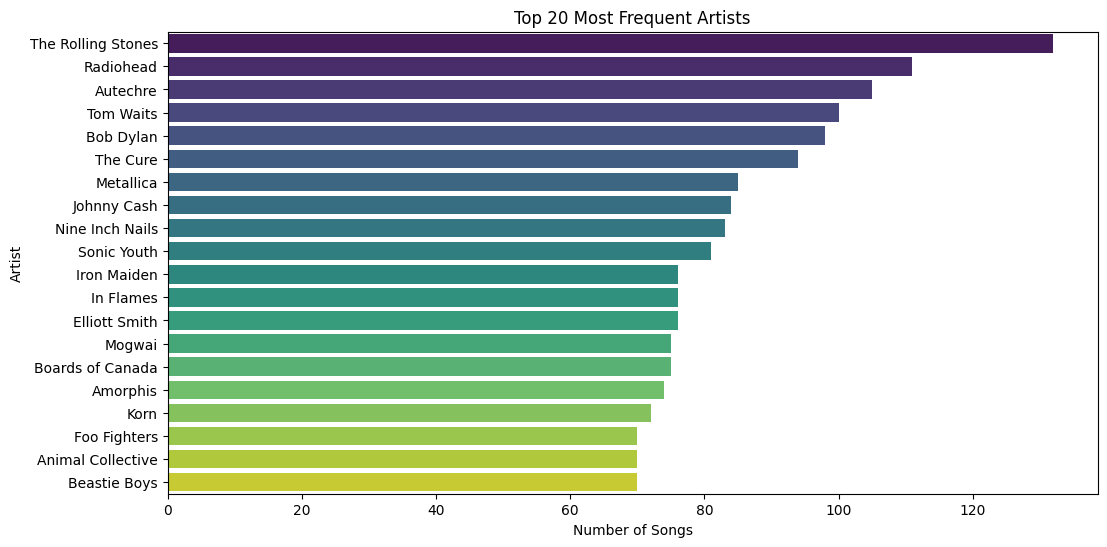

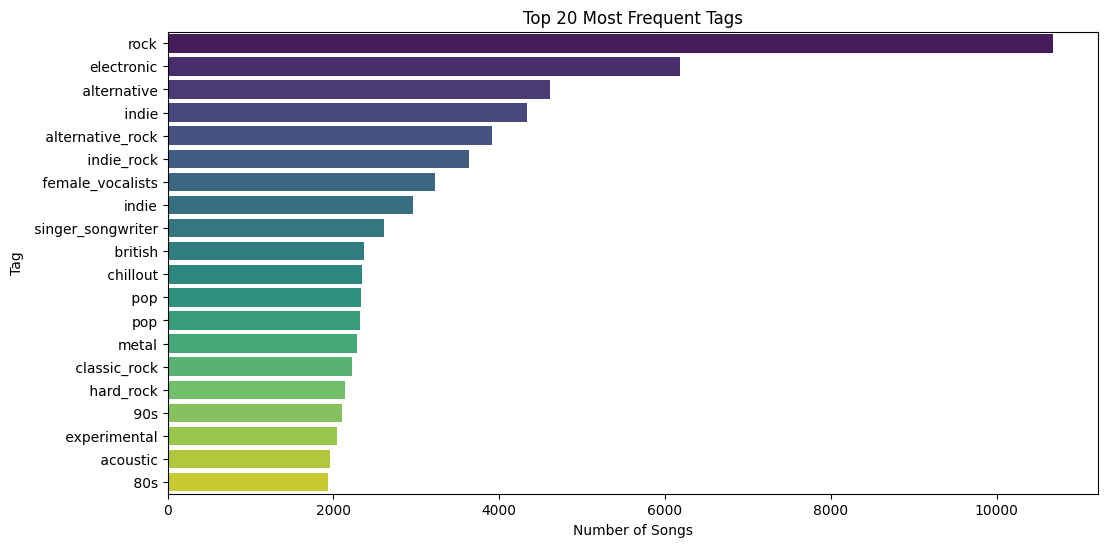

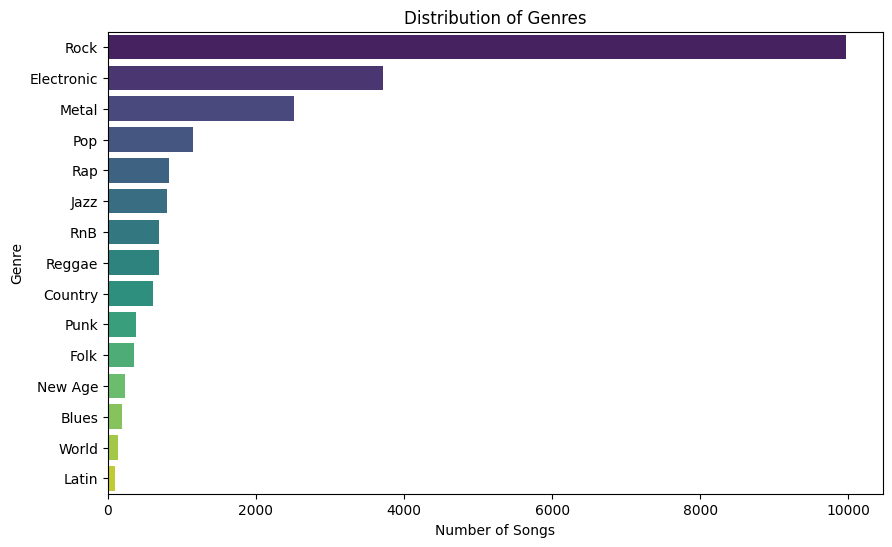

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Top Artists
plt.figure(figsize=(12, 6))
sns.countplot(y='artist', data=music_list, order=music_list['artist'].value_counts().index[:20], palette='viridis')
plt.title('Top 20 Most Frequent Artists')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

# Visualize Top Tags (requires splitting the comma-separated tags)
# Create a list of all individual tags
all_tags = music_list['tags'].dropna().str.split(',', expand=True).stack().reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.countplot(y=all_tags, order=all_tags.value_counts().index[:20], palette='viridis')
plt.title('Top 20 Most Frequent Tags')
plt.xlabel('Number of Songs')
plt.ylabel('Tag')
plt.show()


# Visualize Genres
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=music_list, order=music_list['genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

In [56]:
# Instead of sampling from the original music_list,
# filter music_list to include only the unique tracks present in the user_behavior_list
# after filtering for active users.

# Get the unique track IDs from the user_behavior_list (which has already been filtered for active users)
unique_tracks_in_behavior = user_behavior_list['track_id'].unique()

# Filter the original music_list to keep only these unique tracks
sampled_music_list = music_list[music_list['track_id'].isin(unique_tracks_in_behavior)].copy()

print("Shape of the new sampled_music_list (unique tracks from user behavior):", sampled_music_list.shape)

Shape of the new sampled_music_list (unique tracks from user behavior): (21087, 21)


In [57]:
%pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [58]:
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

In [59]:
# Fill missing values in 'tags' column with an empty string
sampled_music_list['tags'] = sampled_music_list['tags'].fillna('')

# Create a list of strings from the 'tags' column
tag_strings = sampled_music_list['tags'].tolist()

# Generate embeddings for the list of tag strings
tag_embeddings = sentence_model.encode(tag_strings)

# Create a new DataFrame from the generated embeddings
tag_embeddings_df = pd.DataFrame(tag_embeddings, index=sampled_music_list.index)

# Rename columns appropriately
tag_embeddings_df.columns = [f'tag_embedding_{i}' for i in range(tag_embeddings_df.shape[1])]

display(tag_embeddings_df.head())
print("Shape of tag_embeddings_df:", tag_embeddings_df.shape)

tag_embedding_0  tag_embedding_1  tag_embedding_2  tag_embedding_3  \
0          0.028219        -0.134598         0.009486        -0.024977   
1          0.011561        -0.171744         0.061596        -0.047362   
3          0.034156        -0.187334         0.030253        -0.039512   
10        -0.031272        -0.095824         0.005370        -0.041657   
12         0.054572        -0.188805         0.048396        -0.032572   

    tag_embedding_4  tag_embedding_5  tag_embedding_6  tag_embedding_7  \
0          0.020907         0.064192         0.077013         0.035212   
1          0.059686         0.058053         0.075832        -0.005415   
3          0.028391         0.058892         0.088616         0.001722   
10         0.033241         0.056391         0.068153         0.005688   
12         0.036047         0.031596         0.079121        -0.006234   

    tag_embedding_8  tag_embedding_9  ...  tag_embedding_374  \
0         -0.015694         0.005487  ...           0.042875   
1         -0.029382        -0.022505  ...           0.085630   
3         -0.018832        -0.000052  ...           0.060147   
10        -0.061087        -0.023113  ...           0.111488   
12        -0.017096         0.030422  ...           0.103856   

    tag_embedding_375  tag_embedding_376  tag_embedding_377  \
0           -0.048243          -0.055298           0.063190   
1           -0.006384          -0.055466           0.033675   
3           -0.029329          -0.063368           0.025241   
10          -0.031562          -0.078742           0.082583   
12          -0.008144          -0.075644           0.037984   

    tag_embedding_378  tag_embedding_379  tag_embedding_380  \
0           -0.129543           0.066881           0.039409   
1           -0.055235           0.071210           0.020404   
3           -0.085623           0.076967           0.003288   
10          -0.109927           0.094892           0.023311   
12          -0.068500           0.052249           0.053752   

    tag_embedding_381  tag_embedding_382  tag_embedding_383  
0           -0.035132           0.086346          -0.023261  
1            0.006950           0.078134          -0.011489  
3           -0.006429           0.083829           0.001821  
10          -0.043832           0.067977          -0.024604  
12          -0.038941           0.069014          -0.009139  

[5 rows x 384 columns]

Shape of tag_embeddings_df: (21087, 384)


In [60]:
display(tag_embeddings_df.head())
print("Shape of tag_embeddings_df:", tag_embeddings_df.shape)

tag_embedding_0  tag_embedding_1  tag_embedding_2  tag_embedding_3  \
0          0.028219        -0.134598         0.009486        -0.024977   
1          0.011561        -0.171744         0.061596        -0.047362   
3          0.034156        -0.187334         0.030253        -0.039512   
10        -0.031272        -0.095824         0.005370        -0.041657   
12         0.054572        -0.188805         0.048396        -0.032572   

    tag_embedding_4  tag_embedding_5  tag_embedding_6  tag_embedding_7  \
0          0.020907         0.064192         0.077013         0.035212   
1          0.059686         0.058053         0.075832        -0.005415   
3          0.028391         0.058892         0.088616         0.001722   
10         0.033241         0.056391         0.068153         0.005688   
12         0.036047         0.031596         0.079121        -0.006234   

    tag_embedding_8  tag_embedding_9  ...  tag_embedding_374  \
0         -0.015694         0.005487  ...           0.042875   
1         -0.029382        -0.022505  ...           0.085630   
3         -0.018832        -0.000052  ...           0.060147   
10        -0.061087        -0.023113  ...           0.111488   
12        -0.017096         0.030422  ...           0.103856   

    tag_embedding_375  tag_embedding_376  tag_embedding_377  \
0           -0.048243          -0.055298           0.063190   
1           -0.006384          -0.055466           0.033675   
3           -0.029329          -0.063368           0.025241   
10          -0.031562          -0.078742           0.082583   
12          -0.008144          -0.075644           0.037984   

    tag_embedding_378  tag_embedding_379  tag_embedding_380  \
0           -0.129543           0.066881           0.039409   
1           -0.055235           0.071210           0.020404   
3           -0.085623           0.076967           0.003288   
10          -0.109927           0.094892           0.023311   
12          -0.068500           0.052249           0.053752   

    tag_embedding_381  tag_embedding_382  tag_embedding_383  
0           -0.035132           0.086346          -0.023261  
1            0.006950           0.078134          -0.011489  
3           -0.006429           0.083829           0.001821  
10          -0.043832           0.067977          -0.024604  
12          -0.038941           0.069014          -0.009139  

[5 rows x 384 columns]

Shape of tag_embeddings_df: (21087, 384)


In [61]:
# Normalize numeric features and one-hot encode categorical features
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction import FeatureHasher # Import FeatureHasher from sklearn.feature_extraction
import pandas as pd
import numpy as np # Import numpy for sampling

# Define numeric features
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                   'instrumentalness', 'liveness', 'valence', 'tempo', 'year']

# Define categorical features to be one-hot encoded and feature hashed
onehot_features = ['genre']
hash_features = ['artist', 'tags']

# Store the original track_id in a separate column and use a default integer index
original_track_ids = sampled_music_list['track_id']
sampled_music_list = sampled_music_list.reset_index(drop=True) # Reset index to use default integer index

# Separate numeric and categorical data
numeric_data = sampled_music_list[numeric_features]
onehot_data = sampled_music_list[onehot_features]
hash_artist_data = sampled_music_list['artist']
hash_tags_data = sampled_music_list['tags']


# Scale numeric features
scaler = MinMaxScaler()
scaled_numeric_features = scaler.fit_transform(numeric_data)
scaled_numeric_df = pd.DataFrame(scaled_numeric_features, columns=numeric_features) # Use default integer index


# One-hot encode 'genre' feature
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_genre_features = encoder.fit_transform(onehot_data)
ohe_feature_names = encoder.get_feature_names_out(onehot_features)
encoded_genre_df = pd.DataFrame(encoded_genre_features, columns=ohe_feature_names) # Use default integer index


# Feature hash 'artist' and 'tags'
# Ensure data is in the correct format for FeatureHasher (iterable of strings for each sample)
# For artist, wrap in a list
hashed_artist_input = [[str(x)] if pd.notna(x) else [] for x in hash_artist_data]
# For tags, split the comma-separated string into a list
hashed_tags_input = [str(x).split(',') if pd.notna(x) else [] for x in hash_tags_data]


hasher_artist = FeatureHasher(n_features=500, input_type='string')
hashed_artist_features = hasher_artist.fit_transform(hashed_artist_input)
hashed_artist_df = pd.DataFrame(hashed_artist_features.toarray(), columns=[f'hashed_artist_{i}' for i in range(500)]) # Use default integer index

hasher_tags = FeatureHasher(n_features=500, input_type='string')
hashed_tags_features = hasher_tags.fit_transform(hashed_tags_input)
hashed_tags_df = pd.DataFrame(hashed_tags_features.toarray(), columns=[f'hashed_tags_{i}' for i in range(500)]) # Use default integer index

# Ensure tag_embeddings_df has the same index as scaled_numeric_df and other feature dataframes
# Since sampled_music_list was reset_index(drop=True), all subsequent dataframes created from it
# will have a default integer index starting from 0. We just need to make sure tag_embeddings_df
# also has this index. It was created from sampled_music_list with index=sampled_music_list.index,
# which should be the default integer index after reset_index.
tag_embeddings_df = tag_embeddings_df.reset_index(drop=True)


# Concatenate all processed features including tag embeddings
# Concatenate along axis=1, pandas will align based on the default integer index
normalized_song_features = pd.concat([scaled_numeric_df, hashed_artist_df, tag_embeddings_df], axis=1)


# Add the original track_ids as a column
normalized_song_features['track_id'] = original_track_ids.values # Assign the stored original track_ids

# L2 normalize all feature vectors for proper cosine similarity calculations
print("Applying L2 normalization to feature vectors...")
feature_columns_for_normalization = normalized_song_features.columns.drop(['track_id'])
feature_vectors = normalized_song_features[feature_columns_for_normalization].values

# Calculate L2 norms for each row
norms = np.linalg.norm(feature_vectors, axis=1, keepdims=True)
# Avoid division by zero
norms = np.where(norms == 0, 1, norms)
# Normalize
normalized_vectors = feature_vectors / norms

# Update the dataframe with normalized values
normalized_song_features[feature_columns_for_normalization] = normalized_vectors

print(f"Normalized song features shape: {normalized_song_features.shape}")
print("L2 normalization applied successfully!")

display(normalized_song_features.head())
print("Shape of normalized_song_features:", normalized_song_features.shape)

Applying L2 normalization to feature vectors...
Normalized song features shape: (21087, 895)
L2 normalization applied successfully!


danceability    energy  loudness  speechiness  acousticness  \
0      0.161032  0.409752  0.391067     0.034904      0.000533   
1      0.175289  0.376174  0.369400     0.014853      0.000342   
2      0.134985  0.316111  0.383441     0.018514      0.000186   
3      0.268388  0.233580  0.389989     0.022836      0.008041   
4      0.321907  0.281907  0.321982     0.055817      0.013248   

   instrumentalness  liveness   valence     tempo      year  ...  \
0          0.000000  0.043428  0.108426  0.300450  0.386840  ...   
1          0.000000  0.087471  0.277875  0.334298  0.372520  ...   
2          0.000313  0.063445  0.236110  0.226223  0.412599  ...   
3          0.000256  0.064962  0.247519  0.182576  0.409170  ...   
4          0.000555  0.324061  0.329718  0.246546  0.358912  ...   

   tag_embedding_375  tag_embedding_376  tag_embedding_377  tag_embedding_378  \
0          -0.021534          -0.024682           0.028205          -0.057822   
1          -0.002692          -0.023391           0.014201          -0.023294   
2          -0.013963          -0.030168           0.012016          -0.040763   
3          -0.015046          -0.037536           0.039368          -0.052403   
4          -0.003189          -0.029618           0.014872          -0.026820   

   tag_embedding_379  tag_embedding_380  tag_embedding_381  tag_embedding_382  \
0           0.029853           0.017591          -0.015681           0.038541   
1           0.030031           0.008605           0.002931           0.032951   
2           0.036642           0.001565          -0.003060           0.039909   
3           0.045235           0.011112          -0.020895           0.032405   
4           0.020458           0.021046          -0.015247           0.027022   

   tag_embedding_383            track_id  
0          -0.010383  TRIOREW128F424EAF0  
1          -0.004845  TRRIVDJ128F429B0E8  
2           0.000867  TRUEIND128F93038C4  
3          -0.011729  TRIODZU128E078F3E2  
4          -0.003578  TRYEZGE128F92D04C8  

[5 rows x 895 columns]

Shape of normalized_song_features: (21087, 895)


In [62]:
print(normalized_song_features.shape)

(21087, 895)


In [63]:
# Print the column names of the normalized_song_features DataFrame
print("Columns in normalized_song_features:")
print(normalized_song_features.columns.tolist())

Columns in normalized_song_features:
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'year', 'hashed_artist_0', 'hashed_artist_1', 'hashed_artist_2', 'hashed_artist_3', 'hashed_artist_4', 'hashed_artist_5', 'hashed_artist_6', 'hashed_artist_7', 'hashed_artist_8', 'hashed_artist_9', 'hashed_artist_10', 'hashed_artist_11', 'hashed_artist_12', 'hashed_artist_13', 'hashed_artist_14', 'hashed_artist_15', 'hashed_artist_16', 'hashed_artist_17', 'hashed_artist_18', 'hashed_artist_19', 'hashed_artist_20', 'hashed_artist_21', 'hashed_artist_22', 'hashed_artist_23', 'hashed_artist_24', 'hashed_artist_25', 'hashed_artist_26', 'hashed_artist_27', 'hashed_artist_28', 'hashed_artist_29', 'hashed_artist_30', 'hashed_artist_31', 'hashed_artist_32', 'hashed_artist_33', 'hashed_artist_34', 'hashed_artist_35', 'hashed_artist_36', 'hashed_artist_37', 'hashed_artist_38', 'hashed_artist_39', 'hashed_artist_40', 'hashed_artist_41', 'ha

### Content-based filtering using A-NN

In [64]:
!pip install annoy

In [65]:
from annoy import AnnoyIndex

# Determine the feature columns to be used for the index (all columns except 'track_id')
feature_columns = normalized_song_features.columns.drop('track_id')
feature_length = len(feature_columns)

# Initialize a new AnnoyIndex object with the updated feature length
annoy_index = AnnoyIndex(feature_length, 'angular')

# Iterate through the DataFrame and add each song's feature vector to the AnnoyIndex
# Select only the feature columns for iterating
for idx, row in normalized_song_features[feature_columns].iterrows():
    annoy_index.add_item(idx, row.values) # Use the DataFrame row's index and the values of the selected features

# Build the Annoy index with 50 trees
annoy_index.build(50)
print("Annoy index built successfully with new feature length.")

Annoy index built successfully with new feature length.


In [66]:
def build_user_profile(user_id, user_item_matrix, song_features):
    # Get the row for the specific user from the user-item matrix
    user_interactions = user_item_matrix.loc[user_id]

    # Filter for tracks the user liked (playcount > 0) and get their track IDs and playcounts
    liked_tracks_data = user_interactions[user_interactions > 0]
    liked_track_ids = liked_tracks_data.index.tolist() # Convert to list for merging

    if not liked_track_ids:
        # Handle case where the user has no liked tracks in the provided matrix
        return None

    # Get the subset of song_features that correspond to the liked tracks using merge
    # Ensure song_features has a 'track_id' column and a default integer index for merging
    song_features_reset = song_features.reset_index(drop=True) # Ensure default integer index

    # Create a temporary DataFrame of liked track_ids for merging
    liked_track_ids_df = pd.DataFrame({'track_id': liked_track_ids})

    # Merge song_features with liked_track_ids to get features for liked songs
    # Simplify the merge operation
    liked_songs_in_features = pd.merge(liked_track_ids_df, song_features_reset, on='track_id', how='inner')

    # Drop 'item_idx' if it exists (it shouldn't be a feature for the profile)
    if 'item_idx' in liked_songs_in_features.columns:
        liked_songs_in_features = liked_songs_in_features.drop(columns=['item_idx'])


    if liked_songs_in_features.empty:
         # Handle case where none of the liked tracks are in the sampled song features
        return None

    # Align playcounts with liked_songs_features using 'track_id'
    # Create a temporary DataFrame from liked_tracks_data for merging
    liked_playcounts_df = liked_tracks_data.reset_index().rename(columns={'index': 'track_id', user_id: 'playcount'})

    # Merge the features of liked songs with their playcounts
    # Ensure 'item_idx' is not in liked_playcounts_df before merging
    if 'item_idx' in liked_playcounts_df.columns:
         liked_playcounts_df = liked_playcounts_df.drop(columns=['item_idx'])

    liked_songs_with_playcounts = pd.merge(liked_songs_in_features, liked_playcounts_df, on='track_id', how='inner')


    # Select liked songs' features for calculating the profile, excluding 'track_id' and 'playcount'
    feature_columns_for_profile = liked_songs_with_playcounts.columns.drop(['track_id', 'playcount'])
    liked_songs_features = liked_songs_with_playcounts[feature_columns_for_profile]


    # Calculate the weighted mean of the features
    # Multiply each song's feature vector by its playcount and then take the mean
    weighted_features = liked_songs_features.multiply(liked_songs_with_playcounts['playcount'], axis=0)

    # Calculate the sum of weighted features and normalize by the sum of playcounts
    sum_of_playcounts = liked_songs_with_playcounts['playcount'].sum()
    if sum_of_playcounts == 0: # Avoid division by zero if all playcounts are 0 (shouldn't happen with filter > 0, but as safeguard)
        return None
    user_profile = weighted_features.sum(axis=0) / sum_of_playcounts


    return user_profile

In [67]:
def recommend_content_based_annoy(user_id, user_item_matrix, song_features, annoy_index, idx_to_track_id, track_id_to_idx, top_n=10):
    user_profile = build_user_profile(user_id, user_item_matrix, song_features)

    if user_profile is None:
        return [] # Return empty list if user profile cannot be built

    # Ensure the user profile contains only the feature columns used to build the Annoy index
    # Get the list of feature columns from the song_features used to build the index
    feature_columns_for_annoy = song_features.columns.drop('track_id')
    user_profile_features = user_profile[feature_columns_for_annoy]


    # Query Annoy index with user profile vector
    nearest_idx = annoy_index.get_nns_by_vector(
        user_profile_features.values.astype('float32'), # Use the selected feature values
        top_n*2,  # ask for more in case we need to filter out already liked songs
        include_distances=False
    )

    # Map back from index to track_id
    rec_track_ids = [idx_to_track_id[idx] for idx in nearest_idx]

    # Remove tracks the user already liked (optional, depending on use case)
    # This part is commented out in the original code, keeping it that way for now.
    # liked_tracks = user_item_matrix.loc[user_id]
    # already_liked = set(liked_tracks[liked_tracks > 0].index)
    # rec_track_ids = [tid for tid in rec_track_ids if tid not in already_liked]

    # Return top_n
    return rec_track_ids[:top_n]

### Creating Test User-Item Matrix

In [68]:
import numpy as np

# Create user-item matrix
test_user_item_matrix = test_df.pivot_table(index='user_id', columns='track_id', values='playcount').fillna(0)

# Apply log scaling and User-relative normalization using the specified formula
test_user_item_matrix = test_user_item_matrix.apply(lambda x: np.log1p(x) / np.log1p(x).sum(), axis=1)

display(test_user_item_matrix.head())

print("Shape of test_user_item_matrix:", test_user_item_matrix.shape)

track_id                                  TRAAAED128E0783FAB  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAABJS128F9325C99  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAABXA128F9326351  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAACKM12903CE5BE9  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAACPH12903CF5F14  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAADCQ128F932EC14  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAADQW128F427CE68  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAADQX128F422B4CF  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAADVO128E07999E9  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6

Shape of test_user_item_matrix: (5000, 13935)


In [69]:
import numpy as np

# Create user-item matrix
train_user_item_matrix = train_df.pivot_table(index='user_id', columns='track_id', values='playcount').fillna(0)

# Apply log scaling and User-relative normalization using the specified formula
train_user_item_matrix = train_user_item_matrix.apply(lambda x: np.log1p(x) / np.log1p(x).sum(), axis=1)

display(train_user_item_matrix.head())

print("Shape of train_user_item_matrix:", train_user_item_matrix.shape)

track_id                                  TRAAAED128E0783FAB  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAABJS128F9325C99  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAACER128F4290F96  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAACKM12903CE5BE9  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAACPH12903CF5F14  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAACZN128F93236B1  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAACZR12903CDD291  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAADCQ128F932EC14  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6cff1fd999d770124                 0.0   

track_id                                  TRAADQX128F422B4CF  \
user_id                                                        
0030f00cd1d9ccbff086e4ee6541a599484df3b0                 0.0   
00441d21d173bb83e7eae898313e377655ba91b6                 0.0   
004e617d3ffd30b58af1d0beb201f74f4d389f20                 0.0   
0051a2e7b452e3dc67f48688442032df557897f4                 0.0   
005bd06cce533560ba9d28d6

Shape of train_user_item_matrix: (5000, 20171)


In [70]:
# Get all unique track IDs from both train and test sets
all_track_ids = pd.concat([train_df['track_id'], test_df['track_id']]).unique()

# Create user-item matrix for the training set using all unique track IDs
train_user_item_matrix = train_df.pivot_table(index='user_id', columns='track_id', values='playcount').reindex(columns=all_track_ids).fillna(0)

# Apply log scaling and User-relative normalization using the specified formula
train_user_item_matrix = train_user_item_matrix.apply(lambda x: np.log1p(x) / np.log1p(x).sum(), axis=1)

# Create user-item matrix for the test set using all unique track IDs
test_user_item_matrix = test_df.pivot_table(index='user_id', columns='track_id', values='playcount').reindex(columns=all_track_ids).fillna(0)

# Apply log scaling and User-relative normalization using the specified formula
test_user_item_matrix = test_user_item_matrix.apply(lambda x: np.log1p(x) / np.log1p(x).sum(), axis=1)

print("Shape of train_user_item_matrix:", train_user_item_matrix.shape)
print("Shape of test_user_item_matrix:", test_user_item_matrix.shape)

Shape of train_user_item_matrix: (5000, 21087)
Shape of test_user_item_matrix: (5000, 21087)


Liked songs for user: 00043d7bc800ceff4a90459e189eba5d442a1d3d


Empty DataFrame
Columns: [track_id, user_id, playcount]
Index: []

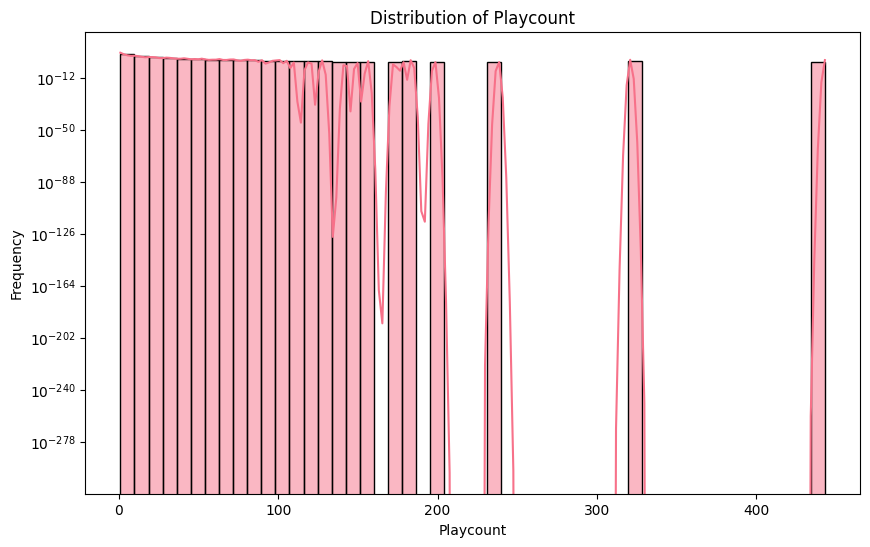

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target user ID
target_user_id = '00043d7bc800ceff4a90459e189eba5d442a1d3d'

# Filter user_behavior_list for the target user and playcount > 0
liked_songs_for_user = user_behavior_list[
    (user_behavior_list['user_id'] == target_user_id) &
    (user_behavior_list['playcount'] > 0)
]

# Display the liked songs for the user
print(f"Liked songs for user: {target_user_id}")
display(liked_songs_for_user)

# Visualize the distribution of playcount in the user_behavior_list
plt.figure(figsize=(10, 6))
sns.histplot(user_behavior_list['playcount'], bins=50, kde=True) # Using user_behavior_list for overall distribution
plt.title('Distribution of Playcount')
plt.xlabel('Playcount')
plt.ylabel('Frequency')
plt.yscale('log') # Use log scale for frequency due to skewed distribution
plt.show()

In [72]:
# Create mappings between index and track_id using the correct index from normalized_song_features
# The Annoy index will use the default integer index of normalized_song_features
# We need to map these integer indices to the 'track_id' strings in the DataFrame.

# Create a list of track_ids corresponding to the integer index
idx_to_track_id = normalized_song_features['track_id'].tolist()

# Create a dictionary mapping track_id strings to the integer index
# We use the default integer index of the DataFrame for this mapping
track_id_to_idx = {track_id: idx for idx, track_id in enumerate(idx_to_track_id)}


print("First 5 entries of idx_to_track_id:", idx_to_track_id[:5])
print("First 5 entries of track_id_to_idx:", dict(list(track_id_to_idx.items())[:5]))

First 5 entries of idx_to_track_id: ['TRIOREW128F424EAF0', 'TRRIVDJ128F429B0E8', 'TRUEIND128F93038C4', 'TRIODZU128E078F3E2', 'TRYEZGE128F92D04C8']
First 5 entries of track_id_to_idx: {'TRIOREW128F424EAF0': 0, 'TRRIVDJ128F429B0E8': 1, 'TRUEIND128F93038C4': 2, 'TRIODZU128E078F3E2': 3, 'TRYEZGE128F92D04C8': 4}


In [73]:
# Enhanced Visualization Code for Music Recommendation Analysis
# This code compares recommended vs actual liked songs across multiple audio features

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def create_comparison_visualizations(test_user_id, recommended_track_ids, actual_liked_track_ids_test,
                                   music_list, test_user_item_matrix):
    """
    Create comprehensive visualizations comparing recommended vs actual liked songs
    across genres, tags, and audio features.
    """

    # Get recommended and actual liked songs data
    recommended_songs_features = music_list[music_list['track_id'].isin(recommended_track_ids)]
    actual_liked_songs_features = music_list[music_list['track_id'].isin(actual_liked_track_ids_test)]

    print(f"Recommendations for user {test_user_id}:")
    display(recommended_songs_features)

    print(f"\nActual liked songs (from test set) for user {test_user_id}:")
    display(actual_liked_songs_features)

    # Set up the plotting style
    plt.style.use('default')
    sns.set_palette("husl")

    # 1. GENRE COMPARISON
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Recommended songs genres
    if not recommended_songs_features.empty and 'genre' in recommended_songs_features.columns:
        genre_counts_rec = recommended_songs_features['genre'].value_counts()
        sns.barplot(y=genre_counts_rec.index, x=genre_counts_rec.values, ax=ax1, palette='viridis')
        ax1.set_title(f'Genres of Recommended Songs for User {test_user_id}')
        ax1.set_xlabel('Number of Songs')
        ax1.set_ylabel('Genre')

    # Actual liked songs genres
    if not actual_liked_songs_features.empty and 'genre' in actual_liked_songs_features.columns:
        genre_counts_actual = actual_liked_songs_features['genre'].value_counts()
        sns.barplot(y=genre_counts_actual.index, x=genre_counts_actual.values, ax=ax2, palette='viridis')
        ax2.set_title(f'Genres of Actual Liked Songs for User {test_user_id}')
        ax2.set_xlabel('Number of Songs')
        ax2.set_ylabel('Genre')

    plt.tight_layout()
    plt.show()

    # 2. TAGS COMPARISON
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

    # Recommended songs tags
    if not recommended_songs_features.empty and 'tags' in recommended_songs_features.columns:
        recommended_tags = recommended_songs_features['tags'].dropna().str.split(',', expand=True).stack().reset_index(drop=True)
        if not recommended_tags.empty:
            tag_counts_rec = recommended_tags.value_counts().head(10)
            sns.barplot(y=tag_counts_rec.index, x=tag_counts_rec.values, ax=ax1, palette='viridis')
            ax1.set_title(f'Top Tags of Recommended Songs for User {test_user_id}')
            ax1.set_xlabel('Number of Songs')
            ax1.set_ylabel('Tag')
        else:
            ax1.text(0.5, 0.5, 'No tags available for recommended songs', ha='center', va='center', transform=ax1.transAxes)
            ax1.set_title(f'Top Tags of Recommended Songs for User {test_user_id}')

    # Actual liked songs tags
    if not actual_liked_songs_features.empty and 'tags' in actual_liked_songs_features.columns:
        actual_liked_tags = actual_liked_songs_features['tags'].dropna().str.split(',', expand=True).stack().reset_index(drop=True)
        if not actual_liked_tags.empty:
            tag_counts_actual = actual_liked_tags.value_counts().head(10)
            sns.barplot(y=tag_counts_actual.index, x=tag_counts_actual.values, ax=ax2, palette='viridis')
            ax2.set_title(f'Top Tags of Actual Liked Songs for User {test_user_id}')
            ax2.set_xlabel('Number of Songs')
            ax2.set_ylabel('Tag')
        else:
            ax2.text(0.5, 0.5, 'No tags available for actual liked songs', ha='center', va='center', transform=ax2.transAxes)
            ax2.set_title(f'Top Tags of Actual Liked Songs for User {test_user_id}')

    plt.tight_layout()
    plt.show()

    # 3. AUDIO FEATURES COMPARISON
    audio_features = ['danceability', 'energy', 'loudness', 'mode', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

    # Create subplots for audio features
    n_features = len(audio_features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

    for i, feature in enumerate(audio_features):
        ax = axes[i]

        # Prepare data for comparison
        rec_data = []
        actual_data = []

        if not recommended_songs_features.empty and feature in recommended_songs_features.columns:
            rec_data = recommended_songs_features[feature].dropna().values

        if not actual_liked_songs_features.empty and feature in actual_liked_songs_features.columns:
            actual_data = actual_liked_songs_features[feature].dropna().values

        # Create comparison plot
        if len(rec_data) > 0 or len(actual_data) > 0:
            # Create box plots for comparison
            data_to_plot = []
            labels = []

            if len(rec_data) > 0:
                data_to_plot.append(rec_data)
                labels.append('Recommended')

            if len(actual_data) > 0:
                data_to_plot.append(actual_data)
                labels.append('Actual Liked')

            # Create box plot
            bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)

            # Color the boxes
            colors = ['lightblue', 'lightcoral']
            for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
                patch.set_facecolor(color)

            ax.set_title(f'{feature.replace("_", " ").title()} Comparison')
            ax.set_ylabel(feature.replace("_", " ").title())
            ax.grid(True, alpha=0.3)

            # Add mean lines
            if len(rec_data) > 0:
                ax.axhline(y=np.mean(rec_data), color='blue', linestyle='--', alpha=0.7, label=f'Rec Mean: {np.mean(rec_data):.3f}')
            if len(actual_data) > 0:
                ax.axhline(y=np.mean(actual_data), color='red', linestyle='--', alpha=0.7, label=f'Actual Mean: {np.mean(actual_data):.3f}')

            ax.legend()
        else:
            ax.text(0.5, 0.5, f'No {feature} data available', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{feature.replace("_", " ").title()} Comparison')

    # Hide empty subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    # 4. STATISTICAL SUMMARY
    print("\n" + "="*80)
    print("STATISTICAL SUMMARY COMPARISON")
    print("="*80)

    for feature in audio_features:
        print(f"\n{feature.upper()}:")
        print("-" * 40)

        if not recommended_songs_features.empty and feature in recommended_songs_features.columns:
            rec_data = recommended_songs_features[feature].dropna()
            if len(rec_data) > 0:
                print(f"Recommended Songs:")
                print(f"  Count: {len(rec_data)}")
                print(f"  Mean: {rec_data.mean():.4f}")
                print(f"  Std:  {rec_data.std():.4f}")
                print(f"  Min:  {rec_data.min():.4f}")
                print(f"  Max:  {rec_data.max():.4f}")
            else:
                print(f"Recommended Songs: No data available")
        else:
            print(f"Recommended Songs: No data available")

        if not actual_liked_songs_features.empty and feature in actual_liked_songs_features.columns:
            actual_data = actual_liked_songs_features[feature].dropna()
            if len(actual_data) > 0:
                print(f"Actual Liked Songs:")
                print(f"  Count: {len(actual_data)}")
                print(f"  Mean: {actual_data.mean():.4f}")
                print(f"  Std:  {actual_data.std():.4f}")
                print(f"  Min:  {actual_data.min():.4f}")
                print(f"  Max:  {actual_data.max():.4f}")
            else:
                print(f"Actual Liked Songs: No data available")
        else:
            print(f"Actual Liked Songs: No data available")

# Usage example (replace with your actual variables):
# create_comparison_visualizations(
#     test_user_id=test_user_id,
#     recommended_track_ids=recommended_track_ids,
#     actual_liked_track_ids_test=actual_liked_track_ids_test,
#     music_list=music_list,
#     test_user_item_matrix=test_user_item_matrix
# )

print("Enhanced visualization function created!")
print("\nTo use this function, call:")
print("create_comparison_visualizations(")
print("    test_user_id=test_user_id,")
print("    recommended_track_ids=recommended_track_ids,")
print("    actual_liked_track_ids_test=actual_liked_track_ids_test,")
print("    music_list=music_list,")
print("    test_user_item_matrix=test_user_item_matrix")
print(")")


Enhanced visualization function created!

To use this function, call:
create_comparison_visualizations(
    test_user_id=test_user_id,
    recommended_track_ids=recommended_track_ids,
    actual_liked_track_ids_test=actual_liked_track_ids_test,
    music_list=music_list,
    test_user_item_matrix=test_user_item_matrix
)


Recommendations for user 0074218512a637790337fa7b04a02570618e545f:


track_id                                             name  \
3978   TRWEKZA128F429EB4F                           Sing Me Spanish Techno   
4574   TREOHMN128F429EA64                              From Blown Speakers   
4869   TRBHQZM128F42A52D2  All The Things That Go To Make Heaven And Earth   
5970   TRXCHZD128E0789005                                        Invisible   
28185  TRBJRZH128F429EA62                             The Electric Version   
31702  TRFSZKI128F4296975                                             Juno   
32436  TRWWMPL128F429EB4C                              The Jessica Numbers   
48508  TRCDGSB128F429EA6C                     The New Face of Zero and One   
48511  TRBCJAL128F429EA70                         Ballad of a Comeback Kid   
50004  TRAVRKY128F429EA68                                Loose Translation   

                      artist  \
3978   The New Pornographers   
4574   The New Pornographers   
4869   The New Pornographers   
5970            Modest Mouse   
28185  The New Pornographers   
31702      Tokyo Police Club   
32436  The New Pornographers   
48508  The New Pornographers   
48511  The New Pornographers   
50004  The New Pornographers   

                                     spotify_preview_url  \
3978   https://p.scdn.co/mp3-preview/8fc7cd37ffda223c...   
4574   https://p.scdn.co/mp3-preview/0c09ed60ddc2c0a6...   
4869   https://p.scdn.co/mp3-preview/7ea194cf15a8bbb1...   
5970   https://p.scdn.co/mp3-preview/4cfc8306b7a50028...   
28185  https://p.scdn.co/mp3-preview/0796538e737c6ba5...   
31702  https://p.scdn.co/mp3-preview/0affd7eb37fed49b...   
32436  https://p.scdn.co/mp3-preview/a21fde7d36dd708a...   
48508  https://p.scdn.co/mp3-preview/124fc629281fcc8b...   
48511  https://p.scdn.co/mp3-preview/cb7f7094c5b93588...   
50004  https://p.scdn.co/mp3-preview/152b87cb5edf228d...   

                   spotify_id  \
3978   0AQ9u2gaJjL5FKg2MyTYfA   
4574   05AA5JbWq8J4k4lhyKhRlv   
4869   3HNgLSxtaQZzRNYScmvnch   
5970   0b5IGFFvHS32PSoFg4x3aH   
28185  1n0tppeA8MEOVtckhUMnmL   
31702  1qLPK7a4bUxK10bhTSCMdV   
32436  4nmGelBeFAT9SNCFsRICIJ   
48508  2jiRaTKbB1aH7VwGgUXsaq   
48511  4sFpslecNLE12QU9r4xtbC   
50004  5Qu79Xa89JOQyZgMKWYtRk   

                                                    tags       genre  year  \
3978                        indie, indie_rock, indie_pop        Rock  2005   
4574   rock, indie, pop, alternative_rock, indie_rock...        Rock  2003   
4869                                   indie, indie_rock        Rock  2007   
5970       rock, indie, indie_rock, post_punk, indie_pop  Electronic  2007   
28185  rock, indie_rock, new_wave, indie_pop, 00s, noise        Rock  2003   
31702                 indie, indie_rock, post_punk, love        Rock  2008   
32436                       indie, indie_rock, indie_pop        Rock  2005   
48508                       rock, indie, pop, indie_rock         NaN  2003   
48511                       rock, indie, pop, indie_rock        Rock  2003   
50004                             indie, pop, indie_rock        Rock  2003   

       duration_ms  danceability  ...  key  loudness  mode  speechiness  \
3978        256653         0.558  ...    9    -3.876     1       0.0307   
4574        169200         0.456  ...    0    -3.903     1       0.0356   
4869        188973         0.527  ...    6    -4.102     1       0.0428   
5970        239720         0.531  ...   11    -1.678     0       0.0492   
28185       173266         0.530  ...    9    -3.094     1       0.1320   
31702       134826         0.604  ...    6    -3.291     1       0.0650   
32436       186733         0.604  ...    9    -3.804     0       0.0508   
48508       251200         0.476  ...    4    -4.802     1       0.0408   
48511       231093         0.553  ...    7    -4.380     1       0.0437   
50004       179600         0.642  ...    9    -4.444     1       0.0318   

       acousticness  instrumentalness  liveness  valence    tempo  \
3978       0.008940       


Actual liked songs (from test set) for user 0074218512a637790337fa7b04a02570618e545f:


track_id                           name  \
506    TRWJYOT128F935572B  In the Aeroplane Over the Sea   
3239   TRQRMNO128F4235E4D          Grow Up and Blow Away   
5578   TRQLWDC128F42396CF                        Cliquot   
13575  TRBSWLF128F1456CB9                    Tiny Voices   
23110  TRVPRMC128F42AE854    English Girls Approximately   
30014  TRRKASB128F429EA6E    Testament to Youth in Verse   
31333  TRRISMS12903CDB605                 Human Interest   
33338  TRCDBSQ128F92F02A0                    Bisbee Blue   
38120  TRRXFHO128EF3550BC                  Fast as I Can   
47245  TRBGSFN128F9324F03           Love Letter to Japan   

                      artist  \
506       Neutral Milk Hotel   
3239                  Metric   
5578                  Beirut   
13575          Box Car Racer   
23110             Ryan Adams   
30014  The New Pornographers   
31333           Hooverphonic   
33338               Calexico   
38120    Stone Temple Pilots   
47245   The Bird and the Bee   

                                     spotify_preview_url  \
506    https://p.scdn.co/mp3-preview/23f5b39b7eb6b130...   
3239   https://p.scdn.co/mp3-preview/7364237ab925cbfa...   
5578   https://p.scdn.co/mp3-preview/97fbe9951620a79a...   
13575  https://p.scdn.co/mp3-preview/9baa22f796913049...   
23110  https://p.scdn.co/mp3-preview/eb019d22b5ae56aa...   
30014  https://p.scdn.co/mp3-preview/8d5a24fb16633e48...   
31333  https://p.scdn.co/mp3-preview/52a8511f68c67413...   
33338  https://p.scdn.co/mp3-preview/7535c2eec914c862...   
38120  https://p.scdn.co/mp3-preview/d3c68ac4bdb4cc91...   
47245  https://p.scdn.co/mp3-preview/ebdea6e109a00dca...   

                   spotify_id  \
506    3xEbrpJTTcsaWMX4gHKd4O   
3239   1ra7AO4p3jzUwhagdFRdbi   
5578   3Is25qMgJEyCM5w764pChe   
13575  1uvVbFloadrUU6Bq70O9fR   
23110  1fui7m6YJkgaXJE5vcWei3   
30014  2hhsaVhDq4eqhy7ewvcVIg   
31333  03huzCuxjYsr2qtT4oNfPi   
33338  0s88f915jua7l6KmOM0MQS   
38120  1MjCvnob720XbcxplOpaL6   
47245  2a0g8qojyJRHYI6oMFVCxv   

                                                    tags genre  year  \
506    rock, alternative, indie, folk, indie_rock, 90...  Rock  1998   
3239   electronic, indie, female_vocalists, indie_roc...  Rock  2007   
5578   indie, experimental, folk, instrumental, singe...  Folk  2007   
13575                          punk, punk_rock, american   NaN  2002   
23110  folk, singer_songwriter, soundtrack, male_voca...   NaN  2004   
30014           indie, pop, indie_rock, piano, indie_pop   NaN  2003   
31333                                           trip_hop   NaN  2002   
33338                  alternative, indie, folk, country  Rock  2006   
38120                           alternative_rock, grunge   NaN  2010   
47245                                  electronic, indie  Rock  2009   

       duration_ms  danceability  ...  key  loudness  mode  speechiness  \
506         202560         0.260  ...    7    -5.093     1       0.0330   
3239        253146         0.679  ...   11    -6.950     0       0.0246   
5578        233520         0.528  ...    4    -7.202     0       0.0307   
13575       207360         0.502  ...    9    -5.780     1       0.0546   
23110       340666         0.489  ...    7    -6.186     1       0.0308   
30014       237626         0.385  ...    4    -4.478     1       0.0529   
31333       227893         0.511  ...    7    -3.970     1       0.0330   
33338       168213         0.692  ...    7    -9.047     1       0.0254   
38120       213586         0.481  ...    0    -4.755     1       0.0452   
47245       247040         0.771  ...    6   -10.425     1       0.0359   

       acousticness  instrumentalness  liveness  valence    tempo  \
506        0.334000          0.000000    0.1140    0.222   93.726   
3239       0.011500          0.000530    0.0820    0.759  110.039   
5578       0.842000          0.000008    0.0956    0.624  150.268   
13575      0.006700          0.000094    0.1510    0.416  152.929   
23110      0.1

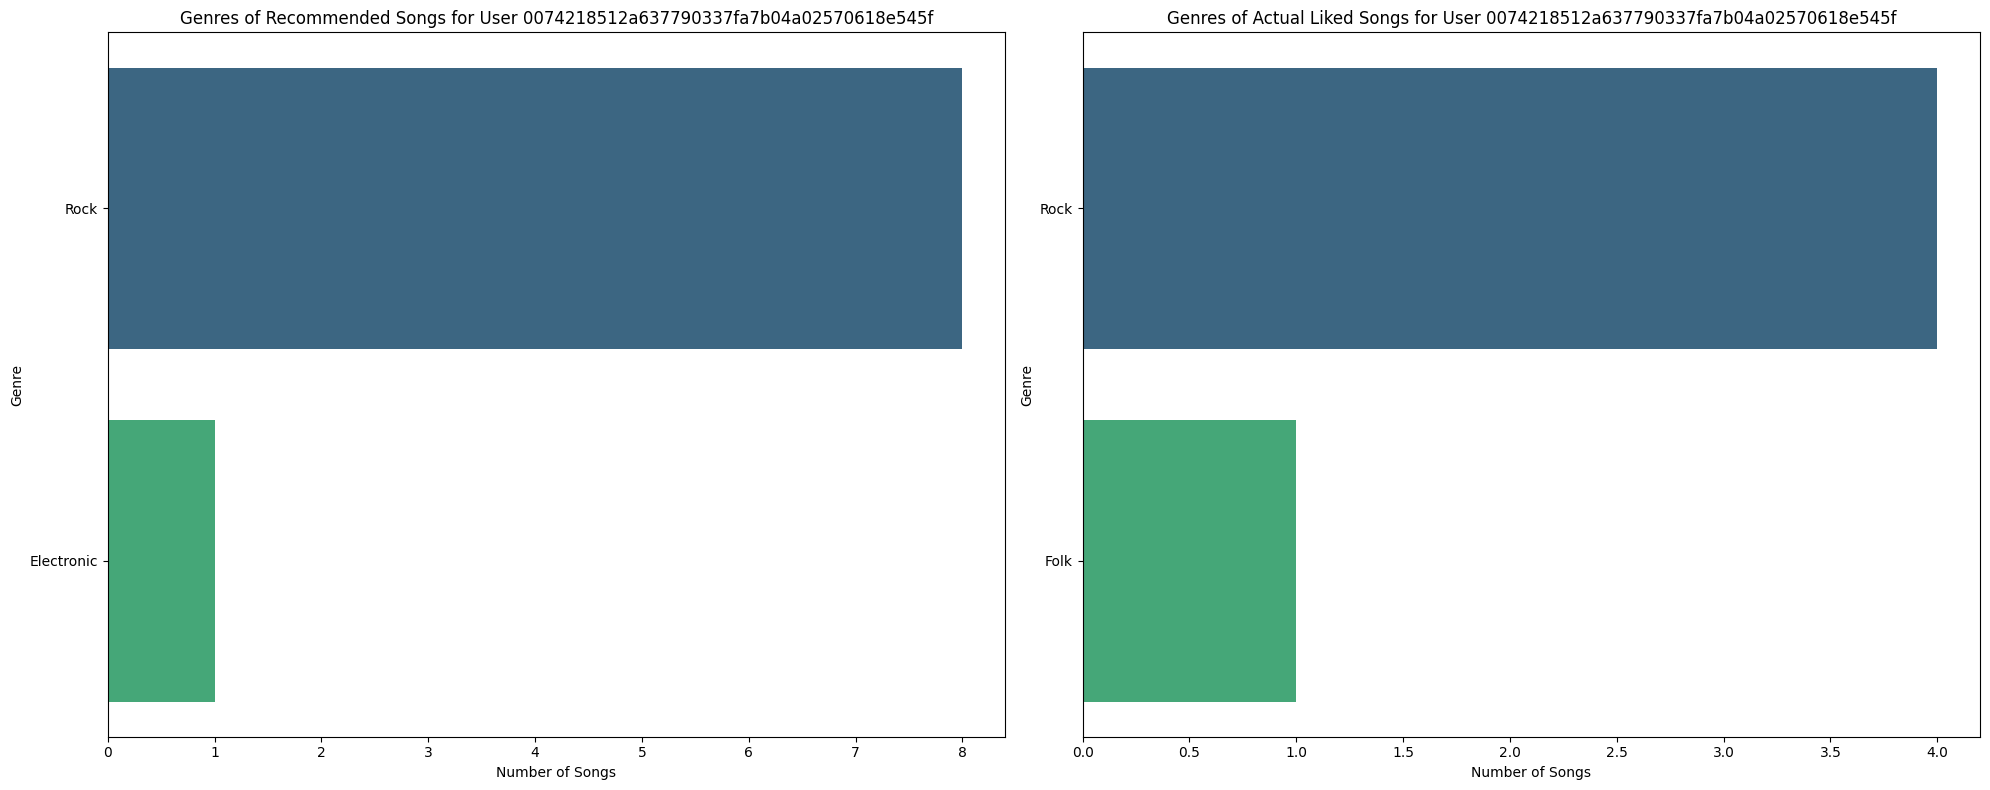

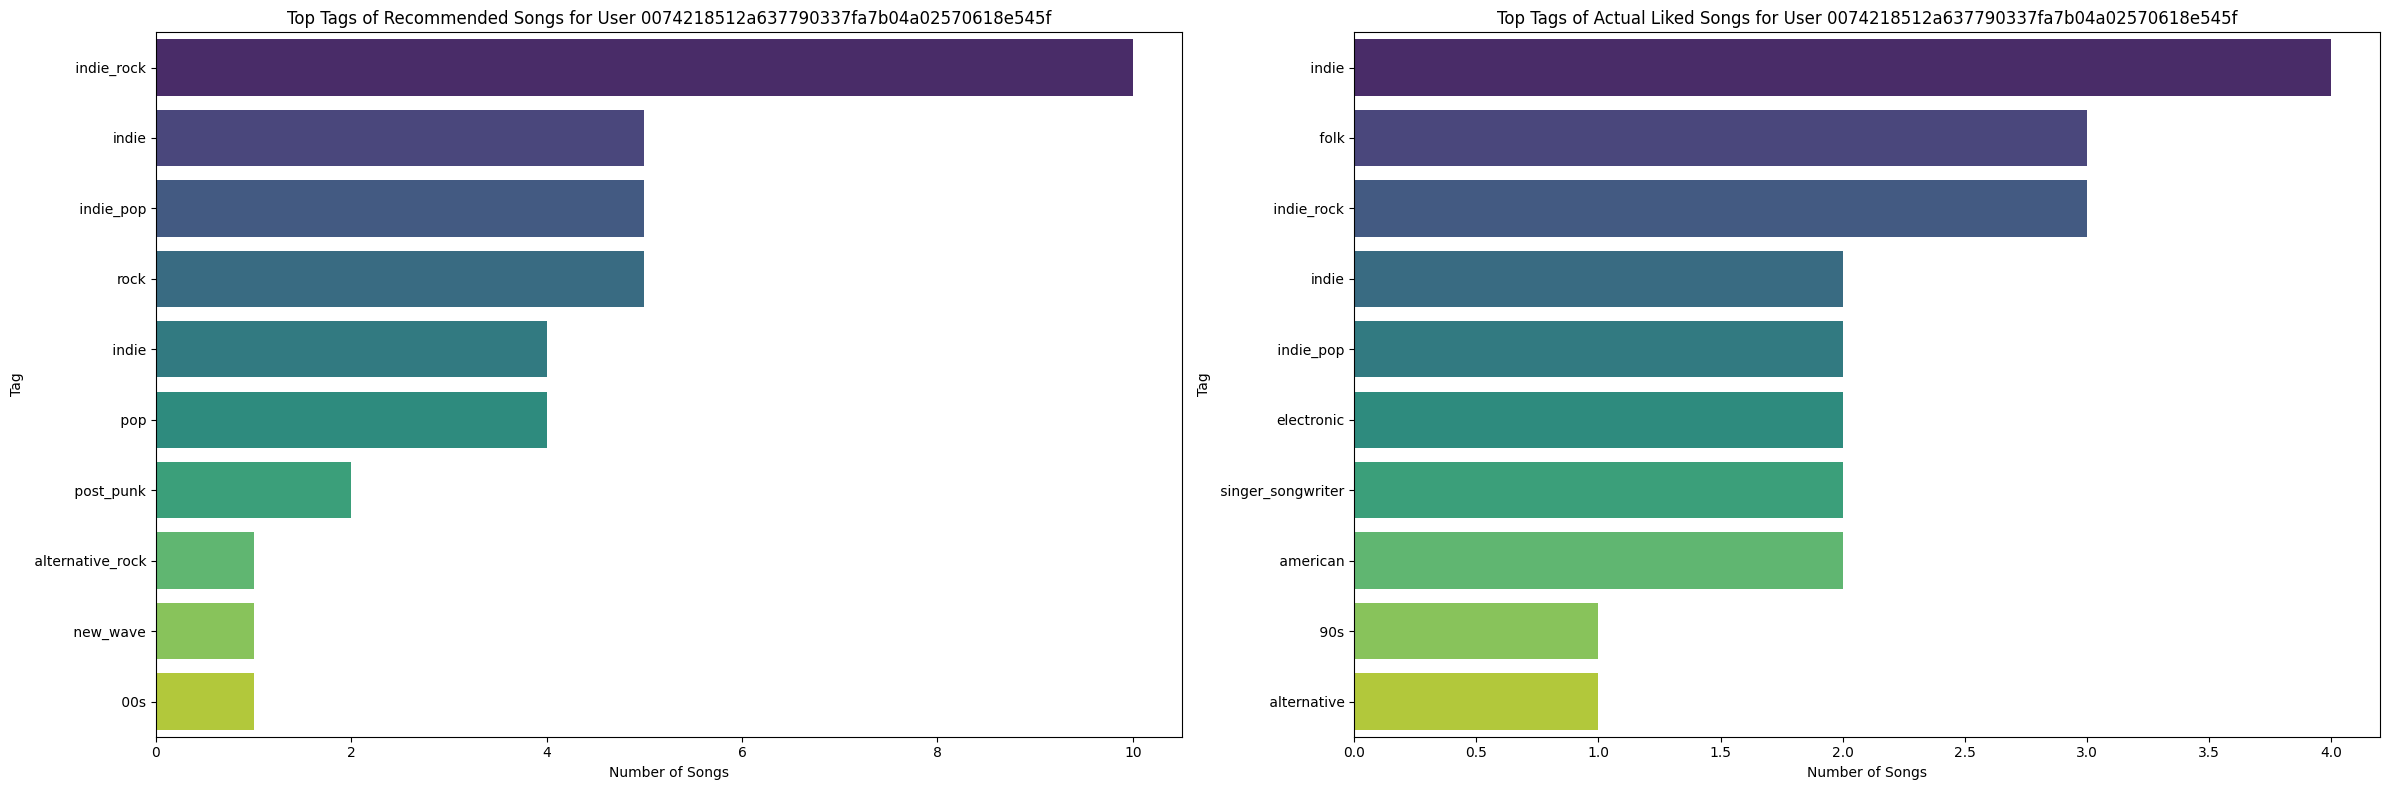

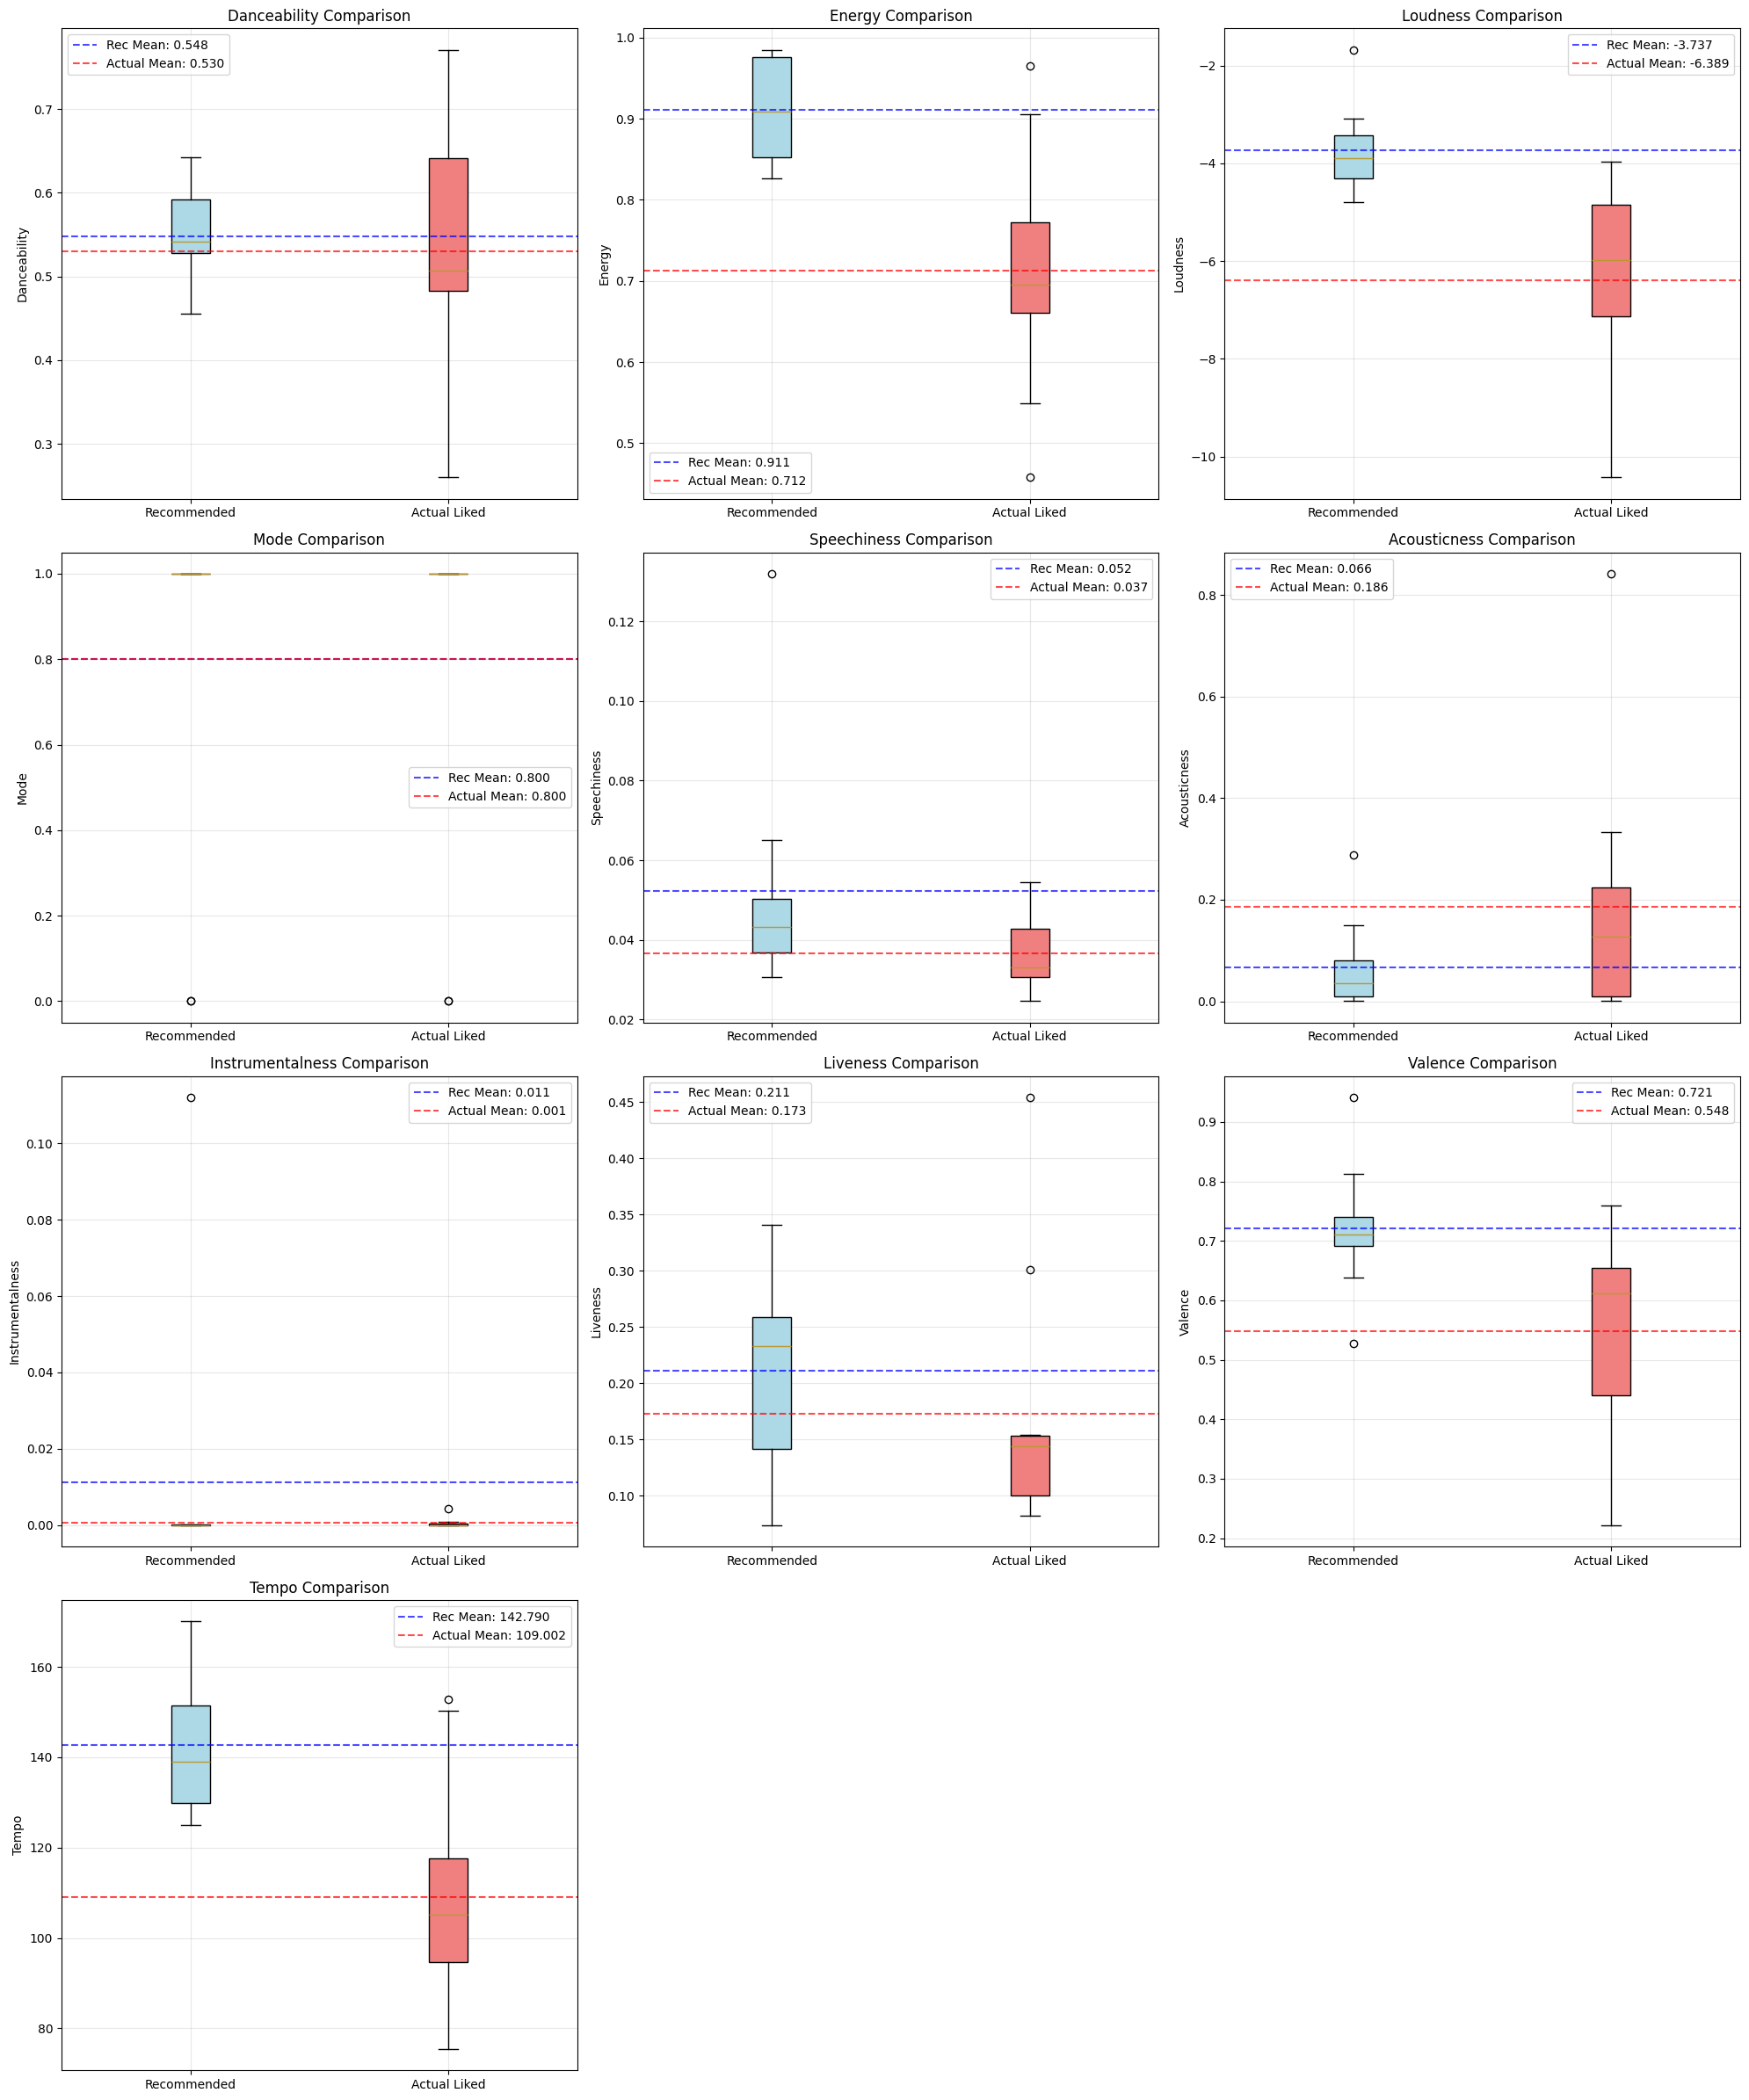


STATISTICAL SUMMARY COMPARISON

DANCEABILITY:
----------------------------------------
Recommended Songs:
  Count: 10
  Mean: 0.5481
  Std:  0.0577
  Min:  0.4560
  Max:  0.6420
Actual Liked Songs:
  Count: 10
  Mean: 0.5298
  Std:  0.1512
  Min:  0.2600
  Max:  0.7710

ENERGY:
----------------------------------------
Recommended Songs:
  Count: 10
  Mean: 0.9113
  Std:  0.0657
  Min:  0.8270
  Max:  0.9850
Actual Liked Songs:
  Count: 10
  Mean: 0.7123
  Std:  0.1504
  Min:  0.4580
  Max:  0.9650

LOUDNESS:
----------------------------------------
Recommended Songs:
  Count: 10
  Mean: -3.7374
  Std:  0.8872
  Min:  -4.8020
  Max:  -1.6780
Actual Liked Songs:
  Count: 10
  Mean: -6.3886
  Std:  2.0708
  Min:  -10.4250
  Max:  -3.9700

MODE:
----------------------------------------
Recommended Songs:
  Count: 10
  Mean: 0.8000
  Std:  0.4216
  Min:  0.0000
  Max:  1.0000
Actual Liked Songs:
  Count: 10
  Mean: 0.8000
  Std:  0.4216
  Min:  0.0000
  Max:  1.0000

SPEECHINESS:
---------

In [74]:
# Select a user ID for testing
test_user_id = list(test_user_item_matrix.index)[6] # You can choose any user ID from the test set

# Get recommendations for the test user
recommended_track_ids = recommend_content_based_annoy(
    user_id=test_user_id,
    user_item_matrix=train_user_item_matrix, # Use the training matrix to build the profile
    song_features=normalized_song_features,
    annoy_index=annoy_index,
    idx_to_track_id=idx_to_track_id,
    track_id_to_idx=track_id_to_idx,
    top_n=10 # Get top 10 recommendations
)

# Retrieve details of the recommended songs from the original music_list
recommended_songs_features = music_list[music_list['track_id'].isin(recommended_track_ids)]

# print(f"Recommendations for user {test_user_id}:")
# display(recommended_songs_features)


# --- Visualization of Recommended Songs ---

# # Visualize the genres of recommended songs
# plt.figure(figsize=(10, 6))
# sns.countplot(y='genre', data=recommended_songs_features.dropna(subset=['genre']), order=recommended_songs_features['genre'].value_counts().index, palette='viridis')
# plt.title(f'Genres of Recommended Songs for User {test_user_id}')
# plt.xlabel('Number of Songs')
# plt.ylabel('Genre')
# plt.show()

# # Visualize the tags of recommended songs (requires splitting the comma-separated tags)
# recommended_tags = recommended_songs_features['tags'].dropna().str.split(',', expand=True).stack().reset_index(drop=True)
# if not recommended_tags.empty:
#     plt.figure(figsize=(12, 6))
#     sns.countplot(y=recommended_tags, order=recommended_tags.value_counts().index[:10], palette='viridis') # Display top 10 tags
#     plt.title(f'Top Tags of Recommended Songs for User {test_user_id}')
#     plt.xlabel('Number of Songs')
#     plt.ylabel('Tag')
#     plt.show()
# else:
#     print("No tags available for visualization in recommended songs.")

# --- Visualization Comparing Recommended vs. Liked Songs (Test Set) ---
# Get the actual liked track IDs for the test user from the test set
actual_liked_tracks_test_user = test_user_item_matrix.loc[test_user_id]
actual_liked_track_ids_test = actual_liked_tracks_test_user[actual_liked_tracks_test_user > 0].index

create_comparison_visualizations(
    test_user_id=test_user_id,
    recommended_track_ids=recommended_track_ids,
    actual_liked_track_ids_test=actual_liked_track_ids_test,
    music_list=music_list,
    test_user_item_matrix=test_user_item_matrix
)



# # Retrieve details of the actual liked songs from the original music_list
# actual_liked_songs_features = music_list[music_list['track_id'].isin(actual_liked_track_ids_test)]

# print(f"\nActual liked songs (from test set) for user {test_user_id}:")
# display(actual_liked_songs_features)

# # Visualize the genres of actual liked songs (from test set)
# plt.figure(figsize=(10, 6))
# sns.countplot(y='genre', data=actual_liked_songs_features.dropna(subset=['genre']), order=actual_liked_songs_features['genre'].value_counts().index, palette='viridis')
# plt.title(f'Genres of Actual Liked Songs (Test Set) for User {test_user_id}')
# plt.xlabel('Number of Songs')
# plt.ylabel('Genre')
# plt.show()

# # Visualize the tags of actual liked songs (from test set)
# actual_liked_tags_test = actual_liked_songs_features['tags'].dropna().str.split(',', expand=True).stack().reset_index(drop=True)
# if not actual_liked_tags_test.empty:
#     plt.figure(figsize=(12, 6))
#     sns.countplot(y=actual_liked_tags_test, order=actual_liked_tags_test.value_counts().index[:10], palette='viridis') # Display top 10 tags
#     plt.title(f'Top Tags of Actual Liked Songs (Test Set) for User {test_user_id}')
#     plt.xlabel('Number of Songs')
#     plt.ylabel('Tag')
#     plt.show()
# else:
#     print("No tags available for visualization in actual liked songs (test set).")

In [75]:
import importlib.util
import sys

# Define the path to the external Python file
evaluation_module_path = 'standalone_evaluation_metrics.py'

# Load the module
spec = importlib.util.spec_from_file_location("standalone_evaluation_metrics", evaluation_module_path)
standalone_evaluation_metrics = importlib.util.module_from_spec(spec)
sys.modules["standalone_evaluation_metrics"] = standalone_evaluation_metrics
spec.loader.exec_module(standalone_evaluation_metrics)

# Import the evaluation functions
from standalone_evaluation_metrics import diversity_ild_at_k, novelty_at_k, serendipity_at_k, evaluate_recommendations, quick_evaluate, print_evaluation_summary, _user_item_sets

print("Evaluation functions loaded successfully.")

Evaluation functions loaded successfully.


In [77]:
"""
Content-Based Music Recommendation System Evaluation
with k values of 5, 10, and 15

This script implements a complete content-based recommendation system
using Annoy (Approximate Nearest Neighbors) and evaluates it using
multiple metrics at different k values.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sentence_transformers import SentenceTransformer
from annoy import AnnoyIndex
import warnings
warnings.filterwarnings('ignore')

# Import evaluation metrics
from standalone_evaluation_metrics import (
    evaluate_recommendations, 
    print_evaluation_summary,
    diversity_ild_at_k,
    novelty_at_k,
    serendipity_at_k,
    ndcg_at_k,
    catalog_coverage_at_k,
    user_coverage_at_k
)

def load_data(dataset_path=''):
    """Load the music dataset and user behavior data."""
    print("Loading data...")
    
    music_list = pd.read_csv(dataset_path + 'music_list.csv')
    user_behavior_list = pd.read_csv(dataset_path + 'user_behavior_list.csv')
    
    print(f"Music list shape: {music_list.shape}")
    print(f"User behavior list shape: {user_behavior_list.shape}")
    
    return music_list, user_behavior_list

def preprocess_data(user_behavior_list, min_songs=50, sample_size=5000):
    """Preprocess user behavior data by filtering active users and sampling."""
    print("Preprocessing data...")
    
    # Group songs of each user
    user_song_list = (
        user_behavior_list
        .groupby('user_id', observed=True)[['track_id', 'playcount']]
        .apply(lambda x: list(zip(x['track_id'], x['playcount'])))
        .to_dict()
    )
    
    # Filter users with listening history more than min_songs
    user_song_list = {user: songs for user, songs in user_song_list.items() if len(songs) >= min_songs}
    print(f"Users with >= {min_songs} songs: {len(user_song_list)}")
    
    # Remove data related to users that have listened to less than min_songs songs
    user_behavior_list = user_behavior_list[user_behavior_list['user_id'].isin(user_song_list.keys())]
    print(f"User behavior list after filtering: {user_behavior_list.shape}")
    
    # Sample users due to memory limitations
    active_users = list(user_song_list.keys())
    rng = np.random.default_rng(seed=42)
    sampled_users = rng.choice(active_users, size=min(sample_size, len(active_users)), replace=False)
    
    # Filter the user_behavior_list DataFrame to include only sampled users
    user_behavior_list = user_behavior_list[user_behavior_list['user_id'].isin(sampled_users)]
    print(f"User behavior list after sampling: {user_behavior_list.shape}")
    
    return user_behavior_list

def split_data(user_behavior_list, test_size=0.2, random_state=42):
    """Split data into training and testing sets."""
    print("Splitting data into train/test sets...")
    
    # Shuffle the data
    user_behavior_list = shuffle(user_behavior_list, random_state=random_state)
    
    # Perform train-test split on a per-user basis
    train_df = user_behavior_list.groupby('user_id', group_keys=False).apply(
        lambda x: x.sample(frac=1-test_size, random_state=random_state)
    )
    test_df = user_behavior_list.drop(train_df.index)
    
    print(f"Train set shape: {train_df.shape}")
    print(f"Test set shape: {test_df.shape}")
    
    return train_df, test_df

def create_user_item_matrices(train_df, test_df):
    """Create user-item matrices for training and testing."""
    print("Creating user-item matrices...")
    
    # Get all unique track IDs from both train and test sets
    all_track_ids = pd.concat([train_df['track_id'], test_df['track_id']]).unique()
    
    # Create user-item matrix for the training set using all unique track IDs
    train_user_item_matrix = train_df.pivot_table(
        index='user_id', columns='track_id', values='playcount'
    ).reindex(columns=all_track_ids).fillna(0)
    
    # Apply log scaling and User-relative normalization
    train_user_item_matrix = train_user_item_matrix.apply(
        lambda x: np.log1p(x) / np.log1p(x).sum(), axis=1
    )
    
    # Create user-item matrix for the test set using all unique track IDs
    test_user_item_matrix = test_df.pivot_table(
        index='user_id', columns='track_id', values='playcount'
    ).reindex(columns=all_track_ids).fillna(0)
    
    # Apply log scaling and User-relative normalization
    test_user_item_matrix = test_user_item_matrix.apply(
        lambda x: np.log1p(x) / np.log1p(x).sum(), axis=1
    )
    
    print(f"Train user-item matrix shape: {train_user_item_matrix.shape}")
    print(f"Test user-item matrix shape: {test_user_item_matrix.shape}")
    
    return train_user_item_matrix, test_user_item_matrix

def process_music_features(music_list, user_behavior_list):
    """Process music features including audio features, tags, and metadata."""
    print("Processing music features...")
    
    # Filter music_list to include only tracks present in user behavior
    unique_tracks_in_behavior = user_behavior_list['track_id'].unique()
    sampled_music_list = music_list[music_list['track_id'].isin(unique_tracks_in_behavior)].copy()
    print(f"Sampled music list shape: {sampled_music_list.shape}")
    
    # Generate tag embeddings using sentence transformers
    print("Generating tag embeddings...")
    sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Fill missing values in 'tags' column with an empty string
    sampled_music_list['tags'] = sampled_music_list['tags'].fillna('')
    
    # Create a list of strings from the 'tags' column
    tag_strings = sampled_music_list['tags'].tolist()
    
    # Generate embeddings for the list of tag strings
    tag_embeddings = sentence_model.encode(tag_strings)
    
    # Create a new DataFrame from the generated embeddings
    tag_embeddings_df = pd.DataFrame(tag_embeddings, index=sampled_music_list.index)
    tag_embeddings_df.columns = [f'tag_embedding_{i}' for i in range(tag_embeddings_df.shape[1])]
    
    print(f"Tag embeddings shape: {tag_embeddings_df.shape}")
    
    # Normalize numeric features and one-hot encode categorical features
    print("Processing audio and metadata features...")
    
    # Define numeric features
    numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                       'instrumentalness', 'liveness', 'valence', 'tempo', 'year']
    
    # Define categorical features
    onehot_features = ['genre']
    hash_features = ['artist', 'tags']
    
    # Store the original track_id in a separate column and use a default integer index
    original_track_ids = sampled_music_list['track_id']
    sampled_music_list = sampled_music_list.reset_index(drop=True)
    
    # Separate numeric and categorical data
    numeric_data = sampled_music_list[numeric_features]
    onehot_data = sampled_music_list[onehot_features]
    hash_artist_data = sampled_music_list['artist']
    hash_tags_data = sampled_music_list['tags']
    
    # Scale numeric features
    scaler = MinMaxScaler()
    scaled_numeric_features = scaler.fit_transform(numeric_data)
    scaled_numeric_df = pd.DataFrame(scaled_numeric_features, columns=numeric_features)
    
    # One-hot encode 'genre' feature
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_genre_features = encoder.fit_transform(onehot_data)
    ohe_feature_names = encoder.get_feature_names_out(onehot_features)
    encoded_genre_df = pd.DataFrame(encoded_genre_features, columns=ohe_feature_names)
    
    # Feature hash 'artist' and 'tags'
    hashed_artist_input = [[str(x)] if pd.notna(x) else [] for x in hash_artist_data]
    hashed_tags_input = [str(x).split(',') if pd.notna(x) else [] for x in hash_tags_data]
    
    hasher_artist = FeatureHasher(n_features=500, input_type='string')
    hashed_artist_features = hasher_artist.fit_transform(hashed_artist_input)
    hashed_artist_df = pd.DataFrame(hashed_artist_features.toarray(), 
                                   columns=[f'hashed_artist_{i}' for i in range(500)])
    
    hasher_tags = FeatureHasher(n_features=500, input_type='string')
    hashed_tags_features = hasher_tags.fit_transform(hashed_tags_input)
    hashed_tags_df = pd.DataFrame(hashed_tags_features.toarray(), 
                                 columns=[f'hashed_tags_{i}' for i in range(500)])
    
    # Ensure tag_embeddings_df has the same index
    tag_embeddings_df = tag_embeddings_df.reset_index(drop=True)
    
    # Concatenate all processed features including tag embeddings
    normalized_song_features = pd.concat([scaled_numeric_df, hashed_artist_df, tag_embeddings_df], axis=1)
    
    # Add the original track_ids as a column
    normalized_song_features['track_id'] = original_track_ids.values
    
    print(f"Normalized song features shape: {normalized_song_features.shape}")
    
    return normalized_song_features, scaler, encoder, hasher_artist, hasher_tags

def build_annoy_index(normalized_song_features):
    """Build Annoy index for approximate nearest neighbor search."""
    print("Building Annoy index...")
    
    # Determine the feature columns to be used for the index (all columns except 'track_id')
    feature_columns = normalized_song_features.columns.drop('track_id')
    feature_length = len(feature_columns)
    
    # Initialize a new AnnoyIndex object
    annoy_index = AnnoyIndex(feature_length, 'angular')
    
    # Iterate through the DataFrame and add each song's feature vector to the AnnoyIndex
    for idx, row in normalized_song_features[feature_columns].iterrows():
        annoy_index.add_item(idx, row.values)
    
    # Build the Annoy index with 50 trees
    annoy_index.build(50)
    print(f"Annoy index built successfully with {annoy_index.get_n_items()} items and {annoy_index.f} dimensions")
    
    return annoy_index, feature_columns

def build_user_profile(user_id, user_item_matrix, song_features):
    """Build user profile based on their listening history."""
    # Get the row for the specific user from the user-item matrix
    user_interactions = user_item_matrix.loc[user_id]
    
    # Filter for tracks the user liked (playcount > 0) and get their track IDs and playcounts
    liked_tracks_data = user_interactions[user_interactions > 0]
    liked_track_ids = liked_tracks_data.index.tolist()
    
    if not liked_track_ids:
        return None
    
    # Get the subset of song_features that correspond to the liked tracks
    song_features_reset = song_features.reset_index(drop=True)
    liked_track_ids_df = pd.DataFrame({'track_id': liked_track_ids})
    liked_songs_in_features = pd.merge(liked_track_ids_df, song_features_reset, on='track_id', how='inner')
    
    if liked_songs_in_features.empty:
        return None
    
    # Align playcounts with liked_songs_features using 'track_id'
    liked_playcounts_df = liked_tracks_data.reset_index().rename(columns={'index': 'track_id', user_id: 'playcount'})
    liked_songs_with_playcounts = pd.merge(liked_songs_in_features, liked_playcounts_df, on='track_id', how='inner')
    
    # Select liked songs' features for calculating the profile, excluding 'track_id' and 'playcount'
    feature_columns_for_profile = liked_songs_with_playcounts.columns.drop(['track_id', 'playcount'])
    liked_songs_features = liked_songs_with_playcounts[feature_columns_for_profile]
    
    # Calculate the weighted mean of the features
    weighted_features = liked_songs_features.multiply(liked_songs_with_playcounts['playcount'], axis=0)
    sum_of_playcounts = liked_songs_with_playcounts['playcount'].sum()
    
    if sum_of_playcounts == 0:
        return None
    
    user_profile = weighted_features.sum(axis=0) / sum_of_playcounts
    return user_profile

def recommend_content_based_annoy(user_id, user_item_matrix, song_features, annoy_index, 
                                 idx_to_track_id, track_id_to_idx, top_n=10):
    """Generate content-based recommendations using Annoy index."""
    user_profile = build_user_profile(user_id, user_item_matrix, song_features)
    
    if user_profile is None:
        return []
    
    # Ensure the user profile contains only the feature columns used to build the Annoy index
    feature_columns_for_annoy = song_features.columns.drop('track_id')
    user_profile_features = user_profile[feature_columns_for_annoy]
    
    # Query Annoy index with user profile vector
    nearest_idx = annoy_index.get_nns_by_vector(
        user_profile_features.values.astype('float32'),
        top_n*2,  # ask for more in case we need to filter out already liked songs
        include_distances=False
    )
    
    # Map back from index to track_id
    rec_track_ids = [idx_to_track_id[idx] for idx in nearest_idx]
    
    # Return top_n
    return rec_track_ids[:top_n]

def create_mappings(normalized_song_features, test_user_item_matrix):
    """Create necessary mappings for evaluation."""
    print("Creating mappings for evaluation...")
    
    # Create mappings between index and track_id
    idx_to_track_id = normalized_song_features['track_id'].tolist()
    track_id_to_idx = {track_id: idx for idx, track_id in enumerate(idx_to_track_id)}
    
    # Create user mappings for evaluation
    all_users_in_test = test_user_item_matrix.index.unique().tolist()
    user_to_idx_eval = {user_id: idx for idx, user_id in enumerate(all_users_in_test)}
    item_to_idx_eval = track_id_to_idx
    
    print(f"Created mappings for {len(user_to_idx_eval)} users and {len(item_to_idx_eval)} items")
    
    return idx_to_track_id, track_id_to_idx, user_to_idx_eval, item_to_idx_eval

def generate_recommendations(test_users, train_user_item_matrix, normalized_song_features, 
                           annoy_index, idx_to_track_id, track_id_to_idx, max_k=15):
    """Generate recommendations for all test users."""
    print(f"Generating recommendations for {len(test_users)} users...")
    
    user_recommendations = {}
    
    for user_id in test_users:
        # Generate recommendations with max_k to cover all evaluation k values
        recommended_track_ids = recommend_content_based_annoy(
            user_id=user_id,
            user_item_matrix=train_user_item_matrix,
            song_features=normalized_song_features,
            annoy_index=annoy_index,
            idx_to_track_id=idx_to_track_id,
            track_id_to_idx=track_id_to_idx,
            top_n=max_k
        )
        
        # Convert to item indices for evaluation
        recommended_item_indices = [track_id_to_idx[tid] for tid in recommended_track_ids if tid in track_id_to_idx]
        user_recommendations[user_id] = np.array(recommended_item_indices)
    
    return user_recommendations

def prepare_evaluation_data(user_recommendations, user_to_idx_eval, item_to_idx_eval, 
                           normalized_song_features, train_df, test_df):
    """Prepare data in the format required for evaluation."""
    print("Preparing evaluation data...")
    
    # Convert user recommendations to evaluation format
    user_recommendations_eval = {}
    for user_id, recs in user_recommendations.items():
        if user_id in user_to_idx_eval:
            user_idx = user_to_idx_eval[user_id]
            user_recommendations_eval[user_idx] = recs
    
    # Prepare item content matrix
    feature_columns_for_eval = normalized_song_features.columns.drop(['track_id'])
    item_content_for_eval = normalized_song_features[feature_columns_for_eval].values
    
    # Filter train/test DFs to include only the test users
    all_users_in_test = list(user_to_idx_eval.keys())
    train_df_eval = train_df[train_df['user_id'].isin(all_users_in_test)].copy()
    test_df_eval = test_df[test_df['user_id'].isin(all_users_in_test)].copy()
    
    print(f"Evaluation data prepared for {len(user_recommendations_eval)} users")
    
    return user_recommendations_eval, item_content_for_eval, train_df_eval, test_df_eval

def run_evaluation(user_recommendations_eval, train_df_eval, test_df_eval, 
                  user_to_idx_eval, item_to_idx_eval, item_content_for_eval, 
                  k_values=[5, 10, 15]):
    """Run comprehensive evaluation with multiple k values."""
    print(f"Running evaluation for k values: {k_values}")
    
    # Define metrics to evaluate
    metrics = ['ndcg', 'novelty', 'diversity', 'serendipity', 'catalog_coverage', 'user_coverage']
    
    # Run evaluation
    evaluation_results = evaluate_recommendations(
        recommendations=user_recommendations_eval,
        train_df=train_df_eval,
        test_df=test_df_eval,
        user_to_idx=user_to_idx_eval,
        item_to_idx=item_to_idx_eval,
        item_content=item_content_for_eval,
        k_values=k_values,
        metrics=metrics
    )
    
    return evaluation_results

def create_evaluation_plots(evaluation_results, k_values=[5, 10, 15]):
    """Create visualization plots for evaluation results."""
    print("Creating evaluation plots...")
    
    # Set up the plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Create subplots for different metrics
    metrics_to_plot = ['ndcg', 'novelty', 'diversity', 'serendipity']
    n_metrics = len(metrics_to_plot)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for i, metric in enumerate(metrics_to_plot):
        if metric in evaluation_results:
            k_scores = evaluation_results[metric]
            k_vals = list(k_scores.keys())
            scores = list(k_scores.values())
            
            axes[i].plot(k_vals, scores, marker='o', linewidth=2, markersize=8)
            axes[i].set_title(f'{metric.upper()}@k', fontsize=14, fontweight='bold')
            axes[i].set_xlabel('k', fontsize=12)
            axes[i].set_ylabel(metric.upper(), fontsize=12)
            axes[i].grid(True, alpha=0.3)
            axes[i].set_xticks(k_vals)
            
            # Add value labels on points
            for k, score in zip(k_vals, scores):
                axes[i].annotate(f'{score:.3f}', (k, score), 
                               textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.tight_layout()
    plt.savefig('evaluation_results_k5_10_15.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create coverage plots
    coverage_metrics = ['catalog_coverage', 'user_coverage']
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    for i, metric in enumerate(coverage_metrics):
        if metric in evaluation_results:
            k_scores = evaluation_results[metric]
            k_vals = list(k_scores.keys())
            scores = list(k_scores.values())
            
            axes[i].bar(k_vals, scores, alpha=0.7, color=f'C{i}')
            axes[i].set_title(f'{metric.replace("_", " ").title()}@k', fontsize=14, fontweight='bold')
            axes[i].set_xlabel('k', fontsize=12)
            axes[i].set_ylabel('Coverage (%)', fontsize=12)
            axes[i].set_xticks(k_vals)
            
            # Add value labels on bars
            for k, score in zip(k_vals, scores):
                axes[i].annotate(f'{score:.1f}%', (k, score), 
                               textcoords="offset points", xytext=(0,5), ha='center')
    
    plt.tight_layout()
    plt.savefig('coverage_results_k5_10_15.png', dpi=300, bbox_inches='tight')
    plt.show()

In [78]:
# Create mappings between index and track_id
idx_to_track_id = normalized_song_features['track_id'].tolist()
track_id_to_idx = {track_id: idx for idx, track_id in enumerate(idx_to_track_id)}

# Create user mappings for evaluation
all_users_in_test = test_user_item_matrix.index.unique().tolist()
user_to_idx_eval = {user_id: idx for idx, user_id in enumerate(all_users_in_test)}
item_to_idx_eval = track_id_to_idx

print(f"Created mappings for {len(user_to_idx_eval)} users and {len(item_to_idx_eval)} items")

# Generate recommendations for all test users
test_users = list(test_user_item_matrix.index)
user_recommendations = {}

print(f"Generating recommendations for {len(test_users)} users...")
for user_id in test_users:
    # Generate recommendations with max_k to cover all evaluation k values
    recommended_track_ids = recommend_content_based_annoy(
        user_id=user_id,
        user_item_matrix=train_user_item_matrix,
        song_features=normalized_song_features,
        annoy_index=annoy_index,
        idx_to_track_id=idx_to_track_id,
        track_id_to_idx=track_id_to_idx,
        top_n=20  # max k value
    )
    
    # Convert to item indices for evaluation
    recommended_item_indices = [track_id_to_idx[tid] for tid in recommended_track_ids if tid in track_id_to_idx]
    user_recommendations[user_id] = np.array(recommended_item_indices)

Created mappings for 5000 users and 21087 items
Generating recommendations for 5000 users...


In [79]:
# Convert user recommendations to evaluation format
user_recommendations_eval = {}
for user_id, recs in user_recommendations.items():
    if user_id in user_to_idx_eval:
        user_idx = user_to_idx_eval[user_id]
        user_recommendations_eval[user_idx] = recs

# Prepare item content matrix
feature_columns_for_eval = normalized_song_features.columns.drop(['track_id'])
item_content_for_eval = normalized_song_features[feature_columns_for_eval].values

# Filter train/test DFs to include only the test users
all_users_in_test = list(user_to_idx_eval.keys())
train_df_eval = train_df[train_df['user_id'].isin(all_users_in_test)].copy()
test_df_eval = test_df[test_df['user_id'].isin(all_users_in_test)].copy()

print(f"Evaluation data prepared for {len(user_recommendations_eval)} users")

Evaluation data prepared for 5000 users


In [80]:
# Define k values and metrics
k_values = [5, 10, 15, 20]
metrics = ['ndcg', 'novelty', 'diversity', 'serendipity', 'catalog_coverage', 'user_coverage']

print(f"Running evaluation for k values: {k_values}")

# Run evaluation
evaluation_results = evaluate_recommendations(
    recommendations=user_recommendations_eval,
    train_df=train_df_eval,
    test_df=test_df_eval,
    user_to_idx=user_to_idx_eval,
    item_to_idx=item_to_idx_eval,
    item_content=item_content_for_eval,
    k_values=k_values,
    metrics=metrics
)

# Print results
print_evaluation_summary(evaluation_results)

Running evaluation for k values: [5, 10, 15, 20]
Evaluating 5000 users across 4 k values...
  Calculating ndcg...
    ndcg@5: 0.0585
    ndcg@10: 0.0540
    ndcg@15: 0.0554
    ndcg@20: 0.0598
  Calculating novelty...
    novelty@5: 7.2561
    novelty@10: 7.3908
    novelty@15: 7.4972
    novelty@20: 7.5912
  Calculating diversity...
    diversity@5: 0.1277
    diversity@10: 0.1508
    diversity@15: 0.1665
    diversity@20: 0.1780
  Calculating serendipity...
    serendipity@5: 0.1078
    serendipity@10: 0.1107
    serendipity@15: 0.1133
    serendipity@20: 0.1155
  Calculating catalog_coverage...
    catalog_coverage@5: 16.8018
    catalog_coverage@10: 24.7404
    catalog_coverage@15: 29.9758
    catalog_coverage@20: 33.4329
  Calculating user_coverage...
    user_coverage@5: 100.0000
    user_coverage@10: 100.0000
    user_coverage@15: 100.0000
    user_coverage@20: 100.0000

RECOMMENDATION EVALUATION SUMMARY

NDCG:
--------------------
  @ 5: 0.0585
  @10: 0.0540
  @15: 0.0554
  @20

In [ ]:
# Check information about the Annoy index
print(f"Number of items in the Annoy index: {annoy_index.get_n_items()}")
print(f"Dimension of vectors in the Annoy index: {annoy_index.f}")

Number of items in the Annoy index: 21087
Dimension of vectors in the Annoy index: 894
